<!-- HTML file automatically generated from DocOnce source (https://github.com/doconce/doconce/)
doconce format html week39.do.txt --no_mako -->
<!-- dom:TITLE: Week 39: Optimization and  Gradient Methods -->

# Week 39: Optimization and  Gradient Methods
**Morten Hjorth-Jensen**, Department of Physics, University of Oslo and Department of Physics and Astronomy and Facility for Rare Isotope Beams, Michigan State University

Date: **Week 39**

## Plan for week 39, September 23-27, 2024

## Lecture Monday September 23

**Material for the lecture on Monday September 23.**

  * Repetition of Logistic regression equations and classification problems and discussion of Gradient methods. Examples on how to implement Logistic Regression and discussion of gradient methods

  * Stochastic Gradient descent with examples and automatic differentiation (theme also for next week).

  * [Video of lecture](https://youtu.be/ISGpTC28Vmk)

  * [Whiteboard notes](https://github.com/CompPhysics/MachineLearning/blob/master/doc/HandWrittenNotes/2024/NotesSeptember23.pdf)

  * Readings and Videos:

    * These lecture notes

    * For a good discussion on gradient methods, we would like to recommend Goodfellow et al section 4.3-4.5 and sections 8.3-8.6. We will come back to the latter chapter in our discussion of Neural networks as well.

    * Raschka et al, pages 53-76 on Logistic regression and pages 37-52 on gradient optimization    

    * [Video on gradient descent](https://www.youtube.com/watch?v=sDv4f4s2SB8)

    * [Video on stochastic gradient descent](https://www.youtube.com/watch?v=vMh0zPT0tLI)

## Lab sessions week 39

**Material for the active learning sessions on Tuesday and Wednesday.**

  * Discussions on how to structure your report for the first project

  * Exercise for week 39 on how to write the abstract and the introduction of the report and how to include references. 

  * Work on project 1, in particular resampling methods like cross-validation and bootstrap. **For more discussions of project 1, chapter 5 of Goodfellow et al is a good read, in particular sections 5.1-5.5 and 5.7-5.11**.

  * [Video on how to write scientific reports recorded during one of the lab sessions](https://youtu.be/tVW1ZDmZnwM)

  * A general guideline can be found at <https://github.com/CompPhysics/MachineLearning/blob/master/doc/Projects/EvaluationGrading/EvaluationForm.md>.

## Lecture Monday September 23, Optimization, the central part of any Machine Learning algortithm

The first few slides here are a repetition from last week. 

Almost every problem in machine learning and data science starts with
a dataset $X$, a model $g(\beta)$, which is a function of the
parameters $\beta$ and a cost function $C(X, g(\beta))$ that allows
us to judge how well the model $g(\beta)$ explains the observations
$X$. The model is fit by finding the values of $\beta$ that minimize
the cost function. Ideally we would be able to solve for $\beta$
analytically, however this is not possible in general and we must use
some approximative/numerical method to compute the minimum.

## Revisiting our Logistic Regression case

In our discussion on Logistic Regression we studied the 
case of
two classes, with $y_i$ either
$0$ or $1$. Furthermore we assumed also that we have only two
parameters $\beta$ in our fitting, that is we
defined probabilities

$$
\begin{align*}
p(y_i=1|x_i,\boldsymbol{\beta}) &= \frac{\exp{(\beta_0+\beta_1x_i)}}{1+\exp{(\beta_0+\beta_1x_i)}},\nonumber\\
p(y_i=0|x_i,\boldsymbol{\beta}) &= 1 - p(y_i=1|x_i,\boldsymbol{\beta}),
\end{align*}
$$

where $\boldsymbol{\beta}$ are the weights we wish to extract from data, in our case $\beta_0$ and $\beta_1$.

## The equations to solve

Our compact equations used a definition of a vector $\boldsymbol{y}$ with $n$
elements $y_i$, an $n\times p$ matrix $\boldsymbol{X}$ which contains the
$x_i$ values and a vector $\boldsymbol{p}$ of fitted probabilities
$p(y_i\vert x_i,\boldsymbol{\beta})$. We rewrote in a more compact form
the first derivative of the cost function as

$$
\frac{\partial \mathcal{C}(\boldsymbol{\beta})}{\partial \boldsymbol{\beta}} = -\boldsymbol{X}^T\left(\boldsymbol{y}-\boldsymbol{p}\right).
$$

If we in addition define a diagonal matrix $\boldsymbol{W}$ with elements 
$p(y_i\vert x_i,\boldsymbol{\beta})(1-p(y_i\vert x_i,\boldsymbol{\beta})$, we can obtain a compact expression of the second derivative as

$$
\frac{\partial^2 \mathcal{C}(\boldsymbol{\beta})}{\partial \boldsymbol{\beta}\partial \boldsymbol{\beta}^T} = \boldsymbol{X}^T\boldsymbol{W}\boldsymbol{X}.
$$

This defines what is called  the Hessian matrix.

## Solving using Newton-Raphson's method

If we can set up these equations, Newton-Raphson's iterative method is normally the method of choice. It requires however that we can compute in an efficient way the  matrices that define the first and second derivatives. 

Our iterative scheme is then given by

$$
\boldsymbol{\beta}^{\mathrm{new}} = \boldsymbol{\beta}^{\mathrm{old}}-\left(\frac{\partial^2 \mathcal{C}(\boldsymbol{\beta})}{\partial \boldsymbol{\beta}\partial \boldsymbol{\beta}^T}\right)^{-1}_{\boldsymbol{\beta}^{\mathrm{old}}}\times \left(\frac{\partial \mathcal{C}(\boldsymbol{\beta})}{\partial \boldsymbol{\beta}}\right)_{\boldsymbol{\beta}^{\mathrm{old}}},
$$

or in matrix form as

$$
\boldsymbol{\beta}^{\mathrm{new}} = \boldsymbol{\beta}^{\mathrm{old}}-\left(\boldsymbol{X}^T\boldsymbol{W}\boldsymbol{X} \right)^{-1}\times \left(-\boldsymbol{X}^T(\boldsymbol{y}-\boldsymbol{p}) \right)_{\boldsymbol{\beta}^{\mathrm{old}}}.
$$

The right-hand side is computed with the old values of $\beta$. 

If we can compute these matrices, in particular the Hessian, the above is often the easiest method to implement.

## Brief reminder on Newton-Raphson's method

Let us quickly remind ourselves how we derive the above method.

Perhaps the most celebrated of all one-dimensional root-finding
routines is Newton's method, also called the Newton-Raphson
method. This method  requires the evaluation of both the
function $f$ and its derivative $f'$ at arbitrary points. 
If you can only calculate the derivative
numerically and/or your function is not of the smooth type, we
normally discourage the use of this method.

## The equations

The Newton-Raphson formula consists geometrically of extending the
tangent line at a current point until it crosses zero, then setting
the next guess to the abscissa of that zero-crossing.  The mathematics
behind this method is rather simple. Employing a Taylor expansion for
$x$ sufficiently close to the solution $s$, we have

<!-- Equation labels as ordinary links -->
<div id="eq:taylornr"></div>

$$
f(s)=0=f(x)+(s-x)f'(x)+\frac{(s-x)^2}{2}f''(x) +\dots.
    \label{eq:taylornr} \tag{1}
$$

For small enough values of the function and for well-behaved
functions, the terms beyond linear are unimportant, hence we obtain

$$
f(x)+(s-x)f'(x)\approx 0,
$$

yielding

$$
s\approx x-\frac{f(x)}{f'(x)}.
$$

Having in mind an iterative procedure, it is natural to start iterating with

$$
x_{n+1}=x_n-\frac{f(x_n)}{f'(x_n)}.
$$

## Simple geometric interpretation

The above is Newton-Raphson's method. It has a simple geometric
interpretation, namely $x_{n+1}$ is the point where the tangent from
$(x_n,f(x_n))$ crosses the $x$-axis.  Close to the solution,
Newton-Raphson converges fast to the desired result. However, if we
are far from a root, where the higher-order terms in the series are
important, the Newton-Raphson formula can give grossly inaccurate
results. For instance, the initial guess for the root might be so far
from the true root as to let the search interval include a local
maximum or minimum of the function.  If an iteration places a trial
guess near such a local extremum, so that the first derivative nearly
vanishes, then Newton-Raphson may fail totally

## Extending to more than one variable

Newton's method can be generalized to systems of several non-linear equations
and variables. Consider the case with two equations

$$
\begin{array}{cc} f_1(x_1,x_2) &=0\\
                     f_2(x_1,x_2) &=0,\end{array}
$$

which we Taylor expand to obtain

$$
\begin{array}{cc} 0=f_1(x_1+h_1,x_2+h_2)=&f_1(x_1,x_2)+h_1
                     \partial f_1/\partial x_1+h_2
                     \partial f_1/\partial x_2+\dots\\
                     0=f_2(x_1+h_1,x_2+h_2)=&f_2(x_1,x_2)+h_1
                     \partial f_2/\partial x_1+h_2
                     \partial f_2/\partial x_2+\dots
                       \end{array}.
$$

Defining the Jacobian matrix ${\bf \boldsymbol{J}}$ we have

$$
{\bf \boldsymbol{J}}=\left( \begin{array}{cc}
                         \partial f_1/\partial x_1  & \partial f_1/\partial x_2 \\
                          \partial f_2/\partial x_1     &\partial f_2/\partial x_2
             \end{array} \right),
$$

we can rephrase Newton's method as

$$
\left(\begin{array}{c} x_1^{n+1} \\ x_2^{n+1} \end{array} \right)=
\left(\begin{array}{c} x_1^{n} \\ x_2^{n} \end{array} \right)+
\left(\begin{array}{c} h_1^{n} \\ h_2^{n} \end{array} \right),
$$

where we have defined

$$
\left(\begin{array}{c} h_1^{n} \\ h_2^{n} \end{array} \right)=
   -{\bf \boldsymbol{J}}^{-1}
   \left(\begin{array}{c} f_1(x_1^{n},x_2^{n}) \\ f_2(x_1^{n},x_2^{n}) \end{array} \right).
$$

We need thus to compute the inverse of the Jacobian matrix and it
is to understand that difficulties  may
arise in case ${\bf \boldsymbol{J}}$ is nearly singular.

It is rather straightforward to extend the above scheme to systems of
more than two non-linear equations. In our case, the Jacobian matrix is given by the Hessian that represents the second derivative of cost function.

## Steepest descent

The basic idea of gradient descent is
that a function $F(\mathbf{x})$, 
$\mathbf{x} \equiv (x_1,\cdots,x_n)$, decreases fastest if one goes from $\bf {x}$ in the
direction of the negative gradient $-\nabla F(\mathbf{x})$.

It can be shown that if

$$
\mathbf{x}_{k+1} = \mathbf{x}_k - \gamma_k \nabla F(\mathbf{x}_k),
$$

with $\gamma_k > 0$.

For $\gamma_k$ small enough, then $F(\mathbf{x}_{k+1}) \leq
F(\mathbf{x}_k)$. This means that for a sufficiently small $\gamma_k$
we are always moving towards smaller function values, i.e a minimum.

## More on Steepest descent

The previous observation is the basis of the method of steepest
descent, which is also referred to as just gradient descent (GD). One
starts with an initial guess $\mathbf{x}_0$ for a minimum of $F$ and
computes new approximations according to

$$
\mathbf{x}_{k+1} = \mathbf{x}_k - \gamma_k \nabla F(\mathbf{x}_k), \ \ k \geq 0.
$$

The parameter $\gamma_k$ is often referred to as the step length or
the learning rate within the context of Machine Learning.

## The ideal

Ideally the sequence $\{\mathbf{x}_k \}_{k=0}$ converges to a global
minimum of the function $F$. In general we do not know if we are in a
global or local minimum. In the special case when $F$ is a convex
function, all local minima are also global minima, so in this case
gradient descent can converge to the global solution. The advantage of
this scheme is that it is conceptually simple and straightforward to
implement. However the method in this form has some severe
limitations:

In machine learing we are often faced with non-convex high dimensional
cost functions with many local minima. Since GD is deterministic we
will get stuck in a local minimum, if the method converges, unless we
have a very good intial guess. This also implies that the scheme is
sensitive to the chosen initial condition.

Note that the gradient is a function of $\mathbf{x} =
(x_1,\cdots,x_n)$ which makes it expensive to compute numerically.

## The sensitiveness of the gradient descent

The gradient descent method 
is sensitive to the choice of learning rate $\gamma_k$. This is due
to the fact that we are only guaranteed that $F(\mathbf{x}_{k+1}) \leq
F(\mathbf{x}_k)$ for sufficiently small $\gamma_k$. The problem is to
determine an optimal learning rate. If the learning rate is chosen too
small the method will take a long time to converge and if it is too
large we can experience erratic behavior.

Many of these shortcomings can be alleviated by introducing
randomness. One such method is that of Stochastic Gradient Descent
(SGD), see below.

## Convex functions

Ideally we want our cost/loss function to be convex(concave).

First we give the definition of a convex set: A set $C$ in
$\mathbb{R}^n$ is said to be convex if, for all $x$ and $y$ in $C$ and
all $t \in (0,1)$ , the point $(1 − t)x + ty$ also belongs to
C. Geometrically this means that every point on the line segment
connecting $x$ and $y$ is in $C$ as discussed below.

The convex subsets of $\mathbb{R}$ are the intervals of
$\mathbb{R}$. Examples of convex sets of $\mathbb{R}^2$ are the
regular polygons (triangles, rectangles, pentagons, etc...).

## Convex function

**Convex function**: Let $X \subset \mathbb{R}^n$ be a convex
set. Assume that the function $f: X \rightarrow \mathbb{R}$ is
continuous, then $f$ is said to be convex if $f(tx_1 + (1-t)x_2) \leq tf(x_1) + (1-t)f(x_2)$
for all $x_1, x_2 \in X$ and for all $t \in [0,1]$.
If $\leq$ is replaced with a strict inequaltiy in the
definition, we demand $x_1 \neq x_2$ and $t\in(0,1)$ then $f$ is said
to be strictly convex. For a single variable function, convexity means
that if you draw a straight line connecting $f(x_1)$ and $f(x_2)$, the
value of the function on the interval $[x_1,x_2]$ is always below the
line as illustrated below.

## Conditions on convex functions

In the following we state first and second-order conditions which
ensures convexity of a function $f$. We write $D_f$ to denote the
domain of $f$, i.e the subset of $R^n$ where $f$ is defined. For more
details and proofs we refer to: [S. Boyd and L. Vandenberghe. Convex Optimization. Cambridge University Press](http://stanford.edu/boyd/cvxbook/).

**First order condition.**

Suppose $f$ is differentiable (i.e $\nabla f(x)$ is well defined for
all $x$ in the domain of $f$). Then $f$ is convex if and only if $D_f$
is a convex set and $f(y) \geq f(x) + \nabla f(x)^T (y-x)$ holds
for all $x,y \in D_f$.

This condition means that for a convex function
the first order Taylor expansion (right hand side above) at any point
a global under estimator of the function. To convince yourself you can
make a drawing of $f(x) = x^2+1$ and draw the tangent line to $f(x)$ and
note that it is always below the graph.

**Second order condition.**

Assume that $f$ is twice
differentiable, i.e the Hessian matrix exists at each point in
$D_f$. Then $f$ is convex if and only if $D_f$ is a convex set and its
Hessian is positive semi-definite for all $x\in D_f$. For a
single-variable function this reduces to $f''(x) \geq 0$. Geometrically this means that $f$ has nonnegative curvature
everywhere.

This condition is particularly useful since it gives us an procedure for determining if the function under consideration is convex, apart from using the definition.

## More on convex functions

The next result is of great importance to us and the reason why we are
going on about convex functions. In machine learning we frequently
have to minimize a loss/cost function in order to find the best
parameters for the model we are considering. 

Ideally we want the
global minimum (for high-dimensional models it is hard to know
if we have local or global minimum). However, if the cost/loss function
is convex the following result provides invaluable information:

**Any minimum is global for convex functions.**

Consider the problem of finding $x \in \mathbb{R}^n$ such that $f(x)$
is minimal, where $f$ is convex and differentiable. Then, any point
$x^*$ that satisfies $\nabla f(x^*) = 0$ is a global minimum.

This result means that if we know that the cost/loss function is convex and we are able to find a minimum, we are guaranteed that it is a global minimum.

## Some simple problems

1. Show that $f(x)=x^2$ is convex for $x \in \mathbb{R}$ using the definition of convexity. Hint: If you re-write the definition, $f$ is convex if the following holds for all $x,y \in D_f$ and any $\lambda \in [0,1]$ $\lambda f(x)+(1-\lambda)f(y)-f(\lambda x + (1-\lambda) y ) \geq 0$.

2. Using the second order condition show that the following functions are convex on the specified domain.

 * $f(x) = e^x$ is convex for $x \in \mathbb{R}$.

 * $g(x) = -\ln(x)$ is convex for $x \in (0,\infty)$.

3. Let $f(x) = x^2$ and $g(x) = e^x$. Show that $f(g(x))$ and $g(f(x))$ is convex for $x \in \mathbb{R}$. Also show that if $f(x)$ is any convex function than $h(x) = e^{f(x)}$ is convex.

4. A norm is any function that satisfy the following properties

 * $f(\alpha x) = |\alpha| f(x)$ for all $\alpha \in \mathbb{R}$.

 * $f(x+y) \leq f(x) + f(y)$

 * $f(x) \leq 0$ for all $x \in \mathbb{R}^n$ with equality if and only if $x = 0$

Using the definition of convexity, try to show that a function satisfying the properties above is convex (the third condition is not needed to show this).

## Standard steepest descent

Before we proceed, we would like to discuss the approach called the
**standard Steepest descent** (different from the above steepest descent discussion), which again leads to us having to be able
to compute a matrix. It belongs to the class of Conjugate Gradient methods (CG).

[The success of the CG method](https://www.cs.cmu.edu/~quake-papers/painless-conjugate-gradient.pdf)
for finding solutions of non-linear problems is based on the theory
of conjugate gradients for linear systems of equations. It belongs to
the class of iterative methods for solving problems from linear
algebra of the type

$$
\boldsymbol{A}\boldsymbol{x} = \boldsymbol{b}.
$$

In the iterative process we end up with a problem like

$$
\boldsymbol{r}= \boldsymbol{b}-\boldsymbol{A}\boldsymbol{x},
$$

where $\boldsymbol{r}$ is the so-called residual or error in the iterative process.

When we have found the exact solution, $\boldsymbol{r}=0$.

## Gradient method

The residual is zero when we reach the minimum of the quadratic equation

$$
P(\boldsymbol{x})=\frac{1}{2}\boldsymbol{x}^T\boldsymbol{A}\boldsymbol{x} - \boldsymbol{x}^T\boldsymbol{b},
$$

with the constraint that the matrix $\boldsymbol{A}$ is positive definite and
symmetric.  This defines also the Hessian and we want it to be  positive definite.

## Steepest descent  method

We denote the initial guess for $\boldsymbol{x}$ as $\boldsymbol{x}_0$. 
We can assume without loss of generality that

$$
\boldsymbol{x}_0=0,
$$

or consider the system

$$
\boldsymbol{A}\boldsymbol{z} = \boldsymbol{b}-\boldsymbol{A}\boldsymbol{x}_0,
$$

instead.

## Steepest descent  method
One can show that the solution $\boldsymbol{x}$ is also the unique minimizer of the quadratic form

$$
f(\boldsymbol{x}) = \frac{1}{2}\boldsymbol{x}^T\boldsymbol{A}\boldsymbol{x} - \boldsymbol{x}^T \boldsymbol{x} , \quad \boldsymbol{x}\in\mathbf{R}^n.
$$

This suggests taking the first basis vector $\boldsymbol{r}_1$ (see below for definition) 
to be the gradient of $f$ at $\boldsymbol{x}=\boldsymbol{x}_0$, 
which equals

$$
\boldsymbol{A}\boldsymbol{x}_0-\boldsymbol{b},
$$

and 
$\boldsymbol{x}_0=0$ it is equal $-\boldsymbol{b}$.

## Final expressions
We can compute the residual iteratively as

$$
\boldsymbol{r}_{k+1}=\boldsymbol{b}-\boldsymbol{A}\boldsymbol{x}_{k+1},
$$

which equals

$$
\boldsymbol{b}-\boldsymbol{A}(\boldsymbol{x}_k+\alpha_k\boldsymbol{r}_k),
$$

or

$$
(\boldsymbol{b}-\boldsymbol{A}\boldsymbol{x}_k)-\alpha_k\boldsymbol{A}\boldsymbol{r}_k,
$$

which gives

$$
\alpha_k = \frac{\boldsymbol{r}_k^T\boldsymbol{r}_k}{\boldsymbol{r}_k^T\boldsymbol{A}\boldsymbol{r}_k}
$$

leading to the iterative scheme

$$
\boldsymbol{x}_{k+1}=\boldsymbol{x}_k+\alpha_k\boldsymbol{r}_{k},
$$

## Steepest descent example

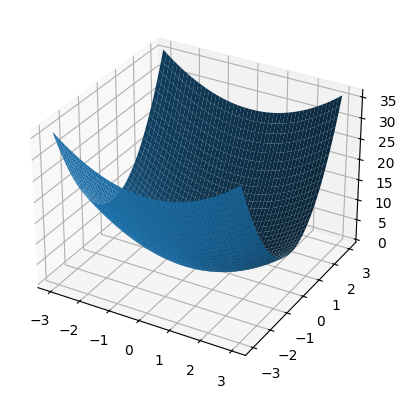

In [1]:
%matplotlib inline

import numpy as np
import numpy.linalg as la

import scipy.optimize as sopt

import matplotlib.pyplot as pt
from mpl_toolkits.mplot3d import axes3d

def f(x):
    return x[0]**2 + 3.0*x[1]**2

def df(x):
    return np.array([2*x[0], 6*x[1]])

fig = pt.figure()
ax = fig.add_subplot(projection = '3d')

xmesh, ymesh = np.mgrid[-3:3:50j,-3:3:50j]
fmesh = f(np.array([xmesh, ymesh]))
ax.plot_surface(xmesh, ymesh, fmesh)

And then as countor plot

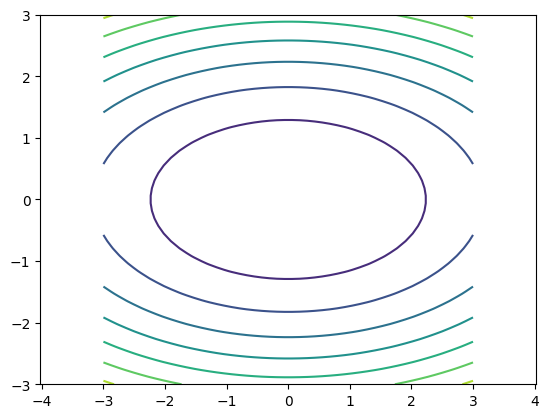

In [2]:
pt.axis("equal")
pt.contour(xmesh, ymesh, fmesh)
guesses = [np.array([2, 2./5])]

Find guesses

In [3]:
x = guesses[-1]
s = -df(x)

Run it!

In [4]:
def f1d(alpha):
    return f(x + alpha*s)

alpha_opt = sopt.golden(f1d)
next_guess = x + alpha_opt * s
guesses.append(next_guess)
print(next_guess)

[ 0.69230769 -0.38461539]


What happened?

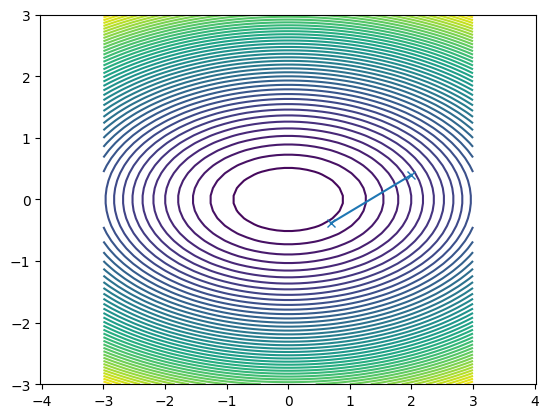

In [5]:
pt.axis("equal")
pt.contour(xmesh, ymesh, fmesh, 50)
it_array = np.array(guesses)
pt.plot(it_array.T[0], it_array.T[1], "x-")

Note that we did only one iteration here. We can easily add more using our previous guesses.

## Conjugate gradient method
In the CG method we define so-called conjugate directions and two vectors 
$\boldsymbol{s}$ and $\boldsymbol{t}$
are said to be
conjugate if

$$
\boldsymbol{s}^T\boldsymbol{A}\boldsymbol{t}= 0.
$$

The philosophy of the CG method is to perform searches in various conjugate directions
of our vectors $\boldsymbol{x}_i$ obeying the above criterion, namely

$$
\boldsymbol{x}_i^T\boldsymbol{A}\boldsymbol{x}_j= 0.
$$

Two vectors are conjugate if they are orthogonal with respect to 
this inner product. Being conjugate is a symmetric relation: if $\boldsymbol{s}$ is conjugate to $\boldsymbol{t}$, then $\boldsymbol{t}$ is conjugate to $\boldsymbol{s}$.

## Conjugate gradient method
An example is given by the eigenvectors of the matrix

$$
\boldsymbol{v}_i^T\boldsymbol{A}\boldsymbol{v}_j= \lambda\boldsymbol{v}_i^T\boldsymbol{v}_j,
$$

which is zero unless $i=j$.

## Conjugate gradient method
Assume now that we have a symmetric positive-definite matrix $\boldsymbol{A}$ of size
$n\times n$. At each iteration $i+1$ we obtain the conjugate direction of a vector

$$
\boldsymbol{x}_{i+1}=\boldsymbol{x}_{i}+\alpha_i\boldsymbol{p}_{i}.
$$

We assume that $\boldsymbol{p}_{i}$ is a sequence of $n$ mutually conjugate directions. 
Then the $\boldsymbol{p}_{i}$  form a basis of $R^n$ and we can expand the solution 
$  \boldsymbol{A}\boldsymbol{x} = \boldsymbol{b}$ in this basis, namely

$$
\boldsymbol{x}  = \sum^{n}_{i=1} \alpha_i \boldsymbol{p}_i.
$$

## Conjugate gradient method
The coefficients are given by

$$
\mathbf{A}\mathbf{x} = \sum^{n}_{i=1} \alpha_i \mathbf{A} \mathbf{p}_i = \mathbf{b}.
$$

Multiplying with $\boldsymbol{p}_k^T$  from the left gives

$$
\boldsymbol{p}_k^T \boldsymbol{A}\boldsymbol{x} = \sum^{n}_{i=1} \alpha_i\boldsymbol{p}_k^T \boldsymbol{A}\boldsymbol{p}_i= \boldsymbol{p}_k^T \boldsymbol{b},
$$

and we can define the coefficients $\alpha_k$ as

$$
\alpha_k = \frac{\boldsymbol{p}_k^T \boldsymbol{b}}{\boldsymbol{p}_k^T \boldsymbol{A} \boldsymbol{p}_k}
$$

## Conjugate gradient method and iterations

If we choose the conjugate vectors $\boldsymbol{p}_k$ carefully, 
then we may not need all of them to obtain a good approximation to the solution 
$\boldsymbol{x}$. 
We want to regard the conjugate gradient method as an iterative method. 
This will us to solve systems where $n$ is so large that the direct 
method would take too much time.

We denote the initial guess for $\boldsymbol{x}$ as $\boldsymbol{x}_0$. 
We can assume without loss of generality that

$$
\boldsymbol{x}_0=0,
$$

or consider the system

$$
\boldsymbol{A}\boldsymbol{z} = \boldsymbol{b}-\boldsymbol{A}\boldsymbol{x}_0,
$$

instead.

## Conjugate gradient method
One can show that the solution $\boldsymbol{x}$ is also the unique minimizer of the quadratic form

$$
f(\boldsymbol{x}) = \frac{1}{2}\boldsymbol{x}^T\boldsymbol{A}\boldsymbol{x} - \boldsymbol{x}^T \boldsymbol{x} , \quad \boldsymbol{x}\in\mathbf{R}^n.
$$

This suggests taking the first basis vector $\boldsymbol{p}_1$ 
to be the gradient of $f$ at $\boldsymbol{x}=\boldsymbol{x}_0$, 
which equals

$$
\boldsymbol{A}\boldsymbol{x}_0-\boldsymbol{b},
$$

and 
$\boldsymbol{x}_0=0$ it is equal $-\boldsymbol{b}$.
The other vectors in the basis will be conjugate to the gradient, 
hence the name conjugate gradient method.

## Conjugate gradient method
Let  $\boldsymbol{r}_k$ be the residual at the $k$-th step:

$$
\boldsymbol{r}_k=\boldsymbol{b}-\boldsymbol{A}\boldsymbol{x}_k.
$$

Note that $\boldsymbol{r}_k$ is the negative gradient of $f$ at 
$\boldsymbol{x}=\boldsymbol{x}_k$, 
so the gradient descent method would be to move in the direction $\boldsymbol{r}_k$. 
Here, we insist that the directions $\boldsymbol{p}_k$ are conjugate to each other, 
so we take the direction closest to the gradient $\boldsymbol{r}_k$  
under the conjugacy constraint. 
This gives the following expression

$$
\boldsymbol{p}_{k+1}=\boldsymbol{r}_k-\frac{\boldsymbol{p}_k^T \boldsymbol{A}\boldsymbol{r}_k}{\boldsymbol{p}_k^T\boldsymbol{A}\boldsymbol{p}_k} \boldsymbol{p}_k.
$$

## Conjugate gradient method
We can also  compute the residual iteratively as

$$
\boldsymbol{r}_{k+1}=\boldsymbol{b}-\boldsymbol{A}\boldsymbol{x}_{k+1},
$$

which equals

$$
\boldsymbol{b}-\boldsymbol{A}(\boldsymbol{x}_k+\alpha_k\boldsymbol{p}_k),
$$

or

$$
(\boldsymbol{b}-\boldsymbol{A}\boldsymbol{x}_k)-\alpha_k\boldsymbol{A}\boldsymbol{p}_k,
$$

which gives

$$
\boldsymbol{r}_{k+1}=\boldsymbol{r}_k-\boldsymbol{A}\boldsymbol{p}_{k},
$$

## Revisiting our first homework

We will use linear regression as a case study for the gradient descent
methods. Linear regression is a great test case for the gradient
descent methods discussed in the lectures since it has several
desirable properties such as:

1. An analytical solution (recall homework set 1).

2. The gradient can be computed analytically.

3. The cost function is convex which guarantees that gradient descent converges for small enough learning rates

We revisit an example similar to what we had in the first homework set. We had a function  of the type

In [6]:
m = 100
x = 2*np.random.rand(m,1)
y = 4+3*x+np.random.randn(m,1)

with $x_i \in [0,1] $ is chosen randomly using a uniform distribution. Additionally we have a stochastic noise chosen according to a normal distribution $\cal {N}(0,1)$. 
The linear regression model is given by

$$
h_\beta(x) = \boldsymbol{y} = \beta_0 + \beta_1 x,
$$

such that

$$
\boldsymbol{y}_i = \beta_0 + \beta_1 x_i.
$$

## Gradient descent example

Let $\mathbf{y} = (y_1,\cdots,y_n)^T$, $\mathbf{\boldsymbol{y}} = (\boldsymbol{y}_1,\cdots,\boldsymbol{y}_n)^T$ and $\beta = (\beta_0, \beta_1)^T$

It is convenient to write $\mathbf{\boldsymbol{y}} = X\beta$ where $X \in \mathbb{R}^{100 \times 2} $ is the design matrix given by (we keep the intercept here)

$$
X \equiv \begin{bmatrix}
1 & x_1  \\
\vdots & \vdots  \\
1 & x_{100} &  \\
\end{bmatrix}.
$$

The cost/loss/risk function is given by (

$$
C(\beta) = \frac{1}{n}||X\beta-\mathbf{y}||_{2}^{2} = \frac{1}{n}\sum_{i=1}^{100}\left[ (\beta_0 + \beta_1 x_i)^2 - 2 y_i (\beta_0 + \beta_1 x_i) + y_i^2\right]
$$

and we want to find $\beta$ such that $C(\beta)$ is minimized.

## The derivative of the cost/loss function

Computing $\partial C(\beta) / \partial \beta_0$ and $\partial C(\beta) / \partial \beta_1$ we can show  that the gradient can be written as

$$
\nabla_{\beta} C(\beta) = \frac{2}{n}\begin{bmatrix} \sum_{i=1}^{100} \left(\beta_0+\beta_1x_i-y_i\right) \\
\sum_{i=1}^{100}\left( x_i (\beta_0+\beta_1x_i)-y_ix_i\right) \\
\end{bmatrix} = \frac{2}{n}X^T(X\beta - \mathbf{y}),
$$

where $X$ is the design matrix defined above.

## The Hessian matrix
The Hessian matrix of $C(\beta)$ is given by

$$
\boldsymbol{H} \equiv \begin{bmatrix}
\frac{\partial^2 C(\beta)}{\partial \beta_0^2} & \frac{\partial^2 C(\beta)}{\partial \beta_0 \partial \beta_1}  \\
\frac{\partial^2 C(\beta)}{\partial \beta_0 \partial \beta_1} & \frac{\partial^2 C(\beta)}{\partial \beta_1^2} &  \\
\end{bmatrix} = \frac{2}{n}X^T X.
$$

This result implies that $C(\beta)$ is a convex function since the matrix $X^T X$ always is positive semi-definite.

## Simple program

We can now write a program that minimizes $C(\beta)$ using the gradient descent method with a constant learning rate $\gamma$ according to

$$
\beta_{k+1} = \beta_k - \gamma \nabla_\beta C(\beta_k), \ k=0,1,\cdots
$$

We can use the expression we computed for the gradient and let use a
$\beta_0$ be chosen randomly and let $\gamma = 0.001$. Stop iterating
when $||\nabla_\beta C(\beta_k) || \leq \epsilon = 10^{-8}$. **Note that the code below does not include the latter stop criterion**.

And finally we can compare our solution for $\beta$ with the analytic result given by 
$\beta= (X^TX)^{-1} X^T \mathbf{y}$.

## Gradient Descent Example

Here our simple example

Eigenvalues of Hessian Matrix:[0.31668291 4.15666977]
[[3.74118981]
 [3.28649035]]
[[3.74118981]
 [3.28649035]]


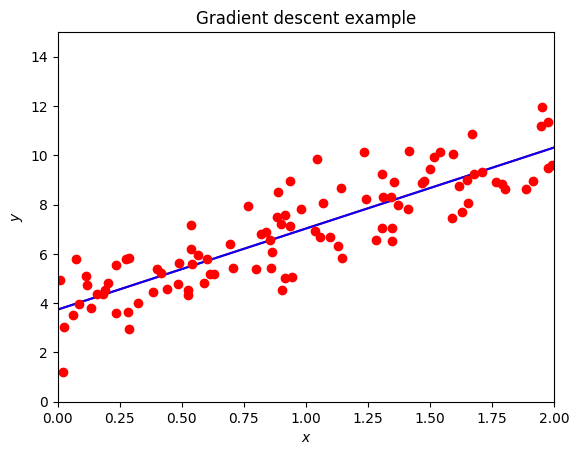

In [7]:

# Importing various packages
from random import random, seed
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import sys

# the number of datapoints
n = 100
x = 2*np.random.rand(n,1)
y = 4+3*x+np.random.randn(n,1)

X = np.c_[np.ones((n,1)), x]
# Hessian matrix
H = (2.0/n)* X.T @ X
# Get the eigenvalues
EigValues, EigVectors = np.linalg.eig(H)
print(f"Eigenvalues of Hessian Matrix:{EigValues}")

beta_linreg = np.linalg.inv(X.T @ X) @ X.T @ y
print(beta_linreg)
beta = np.random.randn(2,1)

eta = 1.0/np.max(EigValues)
Niterations = 1000

for iter in range(Niterations):
    gradient = (2.0/n)*X.T @ (X @ beta-y)
    beta -= eta*gradient

print(beta)
xnew = np.array([[0],[2]])
xbnew = np.c_[np.ones((2,1)), xnew]
ypredict = xbnew.dot(beta)
ypredict2 = xbnew.dot(beta_linreg)
plt.plot(xnew, ypredict, "r-")
plt.plot(xnew, ypredict2, "b-")
plt.plot(x, y ,'ro')
plt.axis([0,2.0,0, 15.0])
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title(r'Gradient descent example')
plt.show()

## And a corresponding example using **scikit-learn**

In [8]:
# Importing various packages
from random import random, seed
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor

n = 100
x = 2*np.random.rand(n,1)
y = 4+3*x+np.random.randn(n,1)

X = np.c_[np.ones((n,1)), x]
beta_linreg = np.linalg.inv(X.T @ X) @ (X.T @ y)
print(beta_linreg)
sgdreg = SGDRegressor(max_iter = 50, penalty=None, eta0=0.1)
sgdreg.fit(x,y.ravel())
print(sgdreg.intercept_, sgdreg.coef_)

[[4.23463496]
 [2.74399625]]
[4.20387361] [2.73436201]


## Gradient descent and Ridge

We have also discussed Ridge regression where the loss function contains a regularized term given by the $L_2$ norm of $\beta$,

$$
C_{\text{ridge}}(\beta) = \frac{1}{n}||X\beta -\mathbf{y}||^2 + \lambda ||\beta||^2, \ \lambda \geq 0.
$$

In order to minimize $C_{\text{ridge}}(\beta)$ using GD we adjust the gradient as follows

$$
\nabla_\beta C_{\text{ridge}}(\beta)  = \frac{2}{n}\begin{bmatrix} \sum_{i=1}^{100} \left(\beta_0+\beta_1x_i-y_i\right) \\
\sum_{i=1}^{100}\left( x_i (\beta_0+\beta_1x_i)-y_ix_i\right) \\
\end{bmatrix} + 2\lambda\begin{bmatrix} \beta_0 \\ \beta_1\end{bmatrix} = 2 (\frac{1}{n}X^T(X\beta - \mathbf{y})+\lambda \beta).
$$

We can easily extend our program to minimize $C_{\text{ridge}}(\beta)$ using gradient descent and compare with the analytical solution given by

$$
\beta_{\text{ridge}} = \left(X^T X + n\lambda I_{2 \times 2} \right)^{-1} X^T \mathbf{y}.
$$

## The Hessian matrix for Ridge Regression
The Hessian matrix of Ridge Regression for our simple example  is given by

$$
\boldsymbol{H} \equiv \begin{bmatrix}
\frac{\partial^2 C(\beta)}{\partial \beta_0^2} & \frac{\partial^2 C(\beta)}{\partial \beta_0 \partial \beta_1}  \\
\frac{\partial^2 C(\beta)}{\partial \beta_0 \partial \beta_1} & \frac{\partial^2 C(\beta)}{\partial \beta_1^2} &  \\
\end{bmatrix} = \frac{2}{n}X^T X+2\lambda\boldsymbol{I}.
$$

This implies that the Hessian matrix  is positive definite, hence the stationary point is a
minimum.
Note that the Ridge cost function is convex being  a sum of two convex
functions. Therefore, the stationary point is a global
minimum of this function.

## Program example for gradient descent with Ridge Regression

Eigenvalues of Hessian Matrix:[0.30988581 4.80658849]
[[4.14058224]
 [2.99719628]]
[[4.14080023]
 [2.99702696]]


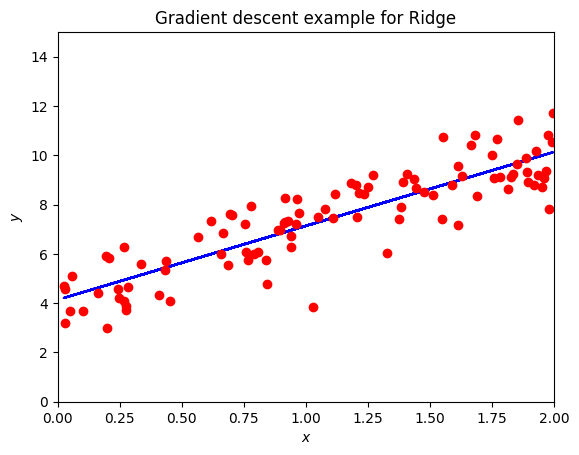

In [9]:
from random import random, seed
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import sys

# the number of datapoints
n = 100
x = 2*np.random.rand(n,1)
y = 4+3*x+np.random.randn(n,1)

X = np.c_[np.ones((n,1)), x]
XT_X = X.T @ X

#Ridge parameter lambda
lmbda  = 0.001
Id = n*lmbda* np.eye(XT_X.shape[0])

# Hessian matrix
H = (2.0/n)* XT_X+2*lmbda* np.eye(XT_X.shape[0])
# Get the eigenvalues
EigValues, EigVectors = np.linalg.eig(H)
print(f"Eigenvalues of Hessian Matrix:{EigValues}")


beta_linreg = np.linalg.inv(XT_X+Id) @ X.T @ y
print(beta_linreg)
# Start plain gradient descent
beta = np.random.randn(2,1)

eta = 1.0/np.max(EigValues)
Niterations = 100

for iter in range(Niterations):
    gradients = 2.0/n*X.T @ (X @ (beta)-y)+2*lmbda*beta
    beta -= eta*gradients

print(beta)
ypredict = X @ beta
ypredict2 = X @ beta_linreg
plt.plot(x, ypredict, "r-")
plt.plot(x, ypredict2, "b-")
plt.plot(x, y ,'ro')
plt.axis([0,2.0,0, 15.0])
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title(r'Gradient descent example for Ridge')
plt.show()

## Using gradient descent methods, limitations

* **Gradient descent (GD) finds local minima of our function**. Since the GD algorithm is deterministic, if it converges, it will converge to a local minimum of our cost/loss/risk function. Because in ML we are often dealing with extremely rugged landscapes with many local minima, this can lead to poor performance.

* **GD is sensitive to initial conditions**. One consequence of the local nature of GD is that initial conditions matter. Depending on where one starts, one will end up at a different local minima. Therefore, it is very important to think about how one initializes the training process. This is true for GD as well as more complicated variants of GD.

* **Gradients are computationally expensive to calculate for large datasets**. In many cases in statistics and ML, the cost/loss/risk function is a sum of terms, with one term for each data point. For example, in linear regression, $E \propto \sum_{i=1}^n (y_i - \mathbf{w}^T\cdot\mathbf{x}_i)^2$; for logistic regression, the square error is replaced by the cross entropy. To calculate the gradient we have to sum over *all* $n$ data points. Doing this at every GD step becomes extremely computationally expensive. An ingenious solution to this, is to calculate the gradients using small subsets of the data called "mini batches". This has the added benefit of introducing stochasticity into our algorithm.

* **GD is very sensitive to choices of learning rates**. GD is extremely sensitive to the choice of learning rates. If the learning rate is very small, the training process take an extremely long time. For larger learning rates, GD can diverge and give poor results. Furthermore, depending on what the local landscape looks like, we have to modify the learning rates to ensure convergence. Ideally, we would *adaptively* choose the learning rates to match the landscape.

* **GD treats all directions in parameter space uniformly.** Another major drawback of GD is that unlike Newton's method, the learning rate for GD is the same in all directions in parameter space. For this reason, the maximum learning rate is set by the behavior of the steepest direction and this can significantly slow down training. Ideally, we would like to take large steps in flat directions and small steps in steep directions. Since we are exploring rugged landscapes where curvatures change, this requires us to keep track of not only the gradient but second derivatives. The ideal scenario would be to calculate the Hessian but this proves to be too computationally expensive. 

* GD can take exponential time to escape saddle points, even with random initialization. As we mentioned, GD is extremely sensitive to initial condition since it determines the particular local minimum GD would eventually reach. However, even with a good initialization scheme, through the introduction of randomness, GD can still take exponential time to escape saddle points.

## Improving gradient descent with momentum

We discuss here some simple examples where we introduce what is called 'memory'about previous steps, or what is normally called momentum gradient descent. The mathematics is explained below in connection with Stochastic gradient descent.

>0 f([0.74724774]) = 0.55838
>1 f([0.59779819]) = 0.35736
>2 f([0.47823856]) = 0.22871
>3 f([0.38259084]) = 0.14638
>4 f([0.30607268]) = 0.09368
>5 f([0.24485814]) = 0.05996
>6 f([0.19588651]) = 0.03837
>7 f([0.15670921]) = 0.02456
>8 f([0.12536737]) = 0.01572
>9 f([0.10029389]) = 0.01006
>10 f([0.08023512]) = 0.00644
>11 f([0.06418809]) = 0.00412
>12 f([0.05135047]) = 0.00264
>13 f([0.04108038]) = 0.00169
>14 f([0.0328643]) = 0.00108
>15 f([0.02629144]) = 0.00069
>16 f([0.02103315]) = 0.00044
>17 f([0.01682652]) = 0.00028
>18 f([0.01346122]) = 0.00018
>19 f([0.01076897]) = 0.00012
>20 f([0.00861518]) = 0.00007
>21 f([0.00689214]) = 0.00005
>22 f([0.00551372]) = 0.00003
>23 f([0.00441097]) = 0.00002
>24 f([0.00352878]) = 0.00001
>25 f([0.00282302]) = 0.00001
>26 f([0.00225842]) = 0.00001
>27 f([0.00180673]) = 0.00000
>28 f([0.00144539]) = 0.00000
>29 f([0.00115631]) = 0.00000


/var/folders/td/3yk470mj5p931p9dtkk0y6jw0000gn/T/ipykernel_58998/394505933.py:33: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('>%d f(%s) = %.5f' % (i, solution, solution_eval))


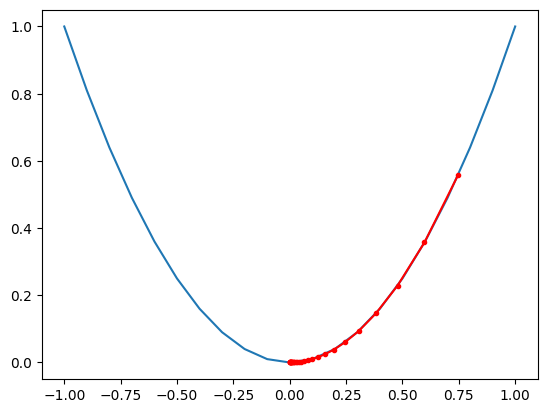

In [10]:
from numpy import asarray
from numpy import arange
from numpy.random import rand
from numpy.random import seed
from matplotlib import pyplot
 
# objective function
def objective(x):
	return x**2.0
 
# derivative of objective function
def derivative(x):
	return x * 2.0
 
# gradient descent algorithm
def gradient_descent(objective, derivative, bounds, n_iter, step_size):
	# track all solutions
	solutions, scores = list(), list()
	# generate an initial point
	solution = bounds[:, 0] + rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])
	# run the gradient descent
	for i in range(n_iter):
		# calculate gradient
		gradient = derivative(solution)
		# take a step
		solution = solution - step_size * gradient
		# evaluate candidate point
		solution_eval = objective(solution)
		# store solution
		solutions.append(solution)
		scores.append(solution_eval)
		# report progress
		print('>%d f(%s) = %.5f' % (i, solution, solution_eval))
	return [solutions, scores]
 
# seed the pseudo random number generator
seed(4)
# define range for input
bounds = asarray([[-1.0, 1.0]])
# define the total iterations
n_iter = 30
# define the step size
step_size = 0.1
# perform the gradient descent search
solutions, scores = gradient_descent(objective, derivative, bounds, n_iter, step_size)
# sample input range uniformly at 0.1 increments
inputs = arange(bounds[0,0], bounds[0,1]+0.1, 0.1)
# compute targets
results = objective(inputs)
# create a line plot of input vs result
pyplot.plot(inputs, results)
# plot the solutions found
pyplot.plot(solutions, scores, '.-', color='red')
# show the plot
pyplot.show()

## Same code but now with momentum gradient descent

>0 f([0.74724774]) = 0.55838
>1 f([0.54175461]) = 0.29350
>2 f([0.37175575]) = 0.13820
>3 f([0.24640494]) = 0.06072
>4 f([0.15951871]) = 0.02545
>5 f([0.1015491]) = 0.01031
>6 f([0.0638484]) = 0.00408
>7 f([0.03976851]) = 0.00158
>8 f([0.02459084]) = 0.00060
>9 f([0.01511937]) = 0.00023
>10 f([0.00925406]) = 0.00009
>11 f([0.00564365]) = 0.00003
>12 f([0.0034318]) = 0.00001
>13 f([0.00208188]) = 0.00000
>14 f([0.00126053]) = 0.00000
>15 f([0.00076202]) = 0.00000
>16 f([0.00046006]) = 0.00000
>17 f([0.00027746]) = 0.00000
>18 f([0.00016719]) = 0.00000
>19 f([0.00010067]) = 0.00000
>20 f([6.05804744e-05]) = 0.00000
>21 f([3.64373635e-05]) = 0.00000
>22 f([2.19069576e-05]) = 0.00000
>23 f([1.31664443e-05]) = 0.00000
>24 f([7.91100141e-06]) = 0.00000
>25 f([4.75216828e-06]) = 0.00000
>26 f([2.85408468e-06]) = 0.00000
>27 f([1.71384267e-06]) = 0.00000
>28 f([1.02900153e-06]) = 0.00000
>29 f([6.17748881e-07]) = 0.00000


/var/folders/td/3yk470mj5p931p9dtkk0y6jw0000gn/T/ipykernel_58998/476849792.py:39: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('>%d f(%s) = %.5f' % (i, solution, solution_eval))


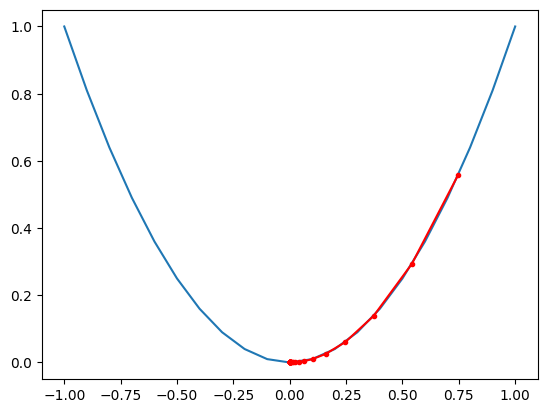

In [11]:
from numpy import asarray
from numpy import arange
from numpy.random import rand
from numpy.random import seed
from matplotlib import pyplot
 
# objective function
def objective(x):
	return x**2.0
 
# derivative of objective function
def derivative(x):
	return x * 2.0
 
# gradient descent algorithm
def gradient_descent(objective, derivative, bounds, n_iter, step_size, momentum):
	# track all solutions
	solutions, scores = list(), list()
	# generate an initial point
	solution = bounds[:, 0] + rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])
	# keep track of the change
	change = 0.0
	# run the gradient descent
	for i in range(n_iter):
		# calculate gradient
		gradient = derivative(solution)
		# calculate update
		new_change = step_size * gradient + momentum * change
		# take a step
		solution = solution - new_change
		# save the change
		change = new_change
		# evaluate candidate point
		solution_eval = objective(solution)
		# store solution
		solutions.append(solution)
		scores.append(solution_eval)
		# report progress
		print('>%d f(%s) = %.5f' % (i, solution, solution_eval))
	return [solutions, scores]
 
# seed the pseudo random number generator
seed(4)
# define range for input
bounds = asarray([[-1.0, 1.0]])
# define the total iterations
n_iter = 30
# define the step size
step_size = 0.1
# define momentum
momentum = 0.3
# perform the gradient descent search with momentum
solutions, scores = gradient_descent(objective, derivative, bounds, n_iter, step_size, momentum)
# sample input range uniformly at 0.1 increments
inputs = arange(bounds[0,0], bounds[0,1]+0.1, 0.1)
# compute targets
results = objective(inputs)
# create a line plot of input vs result
pyplot.plot(inputs, results)
# plot the solutions found
pyplot.plot(solutions, scores, '.-', color='red')
# show the plot
pyplot.show()

## Overview video on Stochastic Gradient Descent

[What is Stochastic Gradient Descent](https://www.youtube.com/watch?v=vMh0zPT0tLI&ab_channel=StatQuestwithJoshStarmer)

## Batches and mini-batches

In gradient descent we compute the cost function and its gradient for all data points we have.

In large-scale applications such as the [ILSVRC challenge](https://www.image-net.org/challenges/LSVRC/), the
training data can have on order of millions of examples. Hence, it
seems wasteful to compute the full cost function over the entire
training set in order to perform only a single parameter update. A
very common approach to addressing this challenge is to compute the
gradient over batches of the training data. For example, a typical batch could contain some thousand  examples from
an  entire training set of several millions. This batch is then used to
perform a parameter update.

## Stochastic Gradient Descent (SGD)

In stochastic gradient descent, the extreme case is the case where we
have only one batch, that is we include the whole data set.

This process is called Stochastic Gradient
Descent (SGD) (or also sometimes on-line gradient descent). This is
relatively less common to see because in practice due to vectorized
code optimizations it can be computationally much more efficient to
evaluate the gradient for 100 examples, than the gradient for one
example 100 times. Even though SGD technically refers to using a
single example at a time to evaluate the gradient, you will hear
people use the term SGD even when referring to mini-batch gradient
descent (i.e. mentions of MGD for “Minibatch Gradient Descent”, or BGD
for “Batch gradient descent” are rare to see), where it is usually
assumed that mini-batches are used. The size of the mini-batch is a
hyperparameter but it is not very common to cross-validate or bootstrap it. It is
usually based on memory constraints (if any), or set to some value,
e.g. 32, 64 or 128. We use powers of 2 in practice because many
vectorized operation implementations work faster when their inputs are
sized in powers of 2.

In our notes with  SGD we mean stochastic gradient descent with mini-batches.

## Stochastic Gradient Descent

Stochastic gradient descent (SGD) and variants thereof address some of
the shortcomings of the Gradient descent method discussed above.

The underlying idea of SGD comes from the observation that the cost
function, which we want to minimize, can almost always be written as a
sum over $n$ data points $\{\mathbf{x}_i\}_{i=1}^n$,

$$
C(\mathbf{\beta}) = \sum_{i=1}^n c_i(\mathbf{x}_i,
\mathbf{\beta}).
$$

## Computation of gradients

This in turn means that the gradient can be
computed as a sum over $i$-gradients

$$
\nabla_\beta C(\mathbf{\beta}) = \sum_i^n \nabla_\beta c_i(\mathbf{x}_i,
\mathbf{\beta}).
$$

Stochasticity/randomness is introduced by only taking the
gradient on a subset of the data called minibatches.  If there are $n$
data points and the size of each minibatch is $M$, there will be $n/M$
minibatches. We denote these minibatches by $B_k$ where
$k=1,\cdots,n/M$.

## SGD example
As an example, suppose we have $10$ data points $(\mathbf{x}_1,\cdots, \mathbf{x}_{10})$ 
and we choose to have $M=5$ minibathces,
then each minibatch contains two data points. In particular we have
$B_1 = (\mathbf{x}_1,\mathbf{x}_2), \cdots, B_5 =
(\mathbf{x}_9,\mathbf{x}_{10})$. Note that if you choose $M=1$ you
have only a single batch with all data points and on the other extreme,
you may choose $M=n$ resulting in a minibatch for each datapoint, i.e
$B_k = \mathbf{x}_k$.

The idea is now to approximate the gradient by replacing the sum over
all data points with a sum over the data points in one the minibatches
picked at random in each gradient descent step

$$
\nabla_{\beta}
C(\mathbf{\beta}) = \sum_{i=1}^n \nabla_\beta c_i(\mathbf{x}_i,
\mathbf{\beta}) \rightarrow \sum_{i \in B_k}^n \nabla_\beta
c_i(\mathbf{x}_i, \mathbf{\beta}).
$$

## The gradient step

Thus a gradient descent step now looks like

$$
\beta_{j+1} = \beta_j - \gamma_j \sum_{i \in B_k}^n \nabla_\beta c_i(\mathbf{x}_i,
\mathbf{\beta})
$$

where $k$ is picked at random with equal
probability from $[1,n/M]$. An iteration over the number of
minibathces (n/M) is commonly referred to as an epoch. Thus it is
typical to choose a number of epochs and for each epoch iterate over
the number of minibatches, as exemplified in the code below.

## Simple example code

In [12]:
import numpy as np 

n = 100 #100 datapoints 
M = 5   #size of each minibatch
m = int(n/M) #number of minibatches
n_epochs = 10 #number of epochs

j = 0
for epoch in range(1,n_epochs+1):
    for i in range(m):
        k = np.random.randint(m) #Pick the k-th minibatch at random
        #Compute the gradient using the data in minibatch Bk
        #Compute new suggestion for 
        j += 1

Taking the gradient only on a subset of the data has two important
benefits. First, it introduces randomness which decreases the chance
that our opmization scheme gets stuck in a local minima. Second, if
the size of the minibatches are small relative to the number of
datapoints ($M <  n$), the computation of the gradient is much
cheaper since we sum over the datapoints in the $k-th$ minibatch and not
all $n$ datapoints.

## When do we stop?

A natural question is when do we stop the search for a new minimum?
One possibility is to compute the full gradient after a given number
of epochs and check if the norm of the gradient is smaller than some
threshold and stop if true. However, the condition that the gradient
is zero is valid also for local minima, so this would only tell us
that we are close to a local/global minimum. However, we could also
evaluate the cost function at this point, store the result and
continue the search. If the test kicks in at a later stage we can
compare the values of the cost function and keep the $\beta$ that
gave the lowest value.

## Slightly different approach

Another approach is to let the step length $\gamma_j$ depend on the
number of epochs in such a way that it becomes very small after a
reasonable time such that we do not move at all. Such approaches are
also called scaling. There are many such ways to [scale the learning
rate](https://towardsdatascience.com/gradient-descent-the-learning-rate-and-the-importance-of-feature-scaling-6c0b416596e1)
and [discussions here](https://www.jmlr.org/papers/volume23/20-1258/20-1258.pdf). See
also
<https://towardsdatascience.com/learning-rate-schedules-and-adaptive-learning-rate-methods-for-deep-learning-2c8f433990d1>
for a discussion of different scaling functions for the learning rate.

## Time decay rate

As an example, let $e = 0,1,2,3,\cdots$ denote the current epoch and let $t_0, t_1 > 0$ be two fixed numbers. Furthermore, let $t = e \cdot m + i$ where $m$ is the number of minibatches and $i=0,\cdots,m-1$. Then the function $$\gamma_j(t; t_0, t_1) = \frac{t_0}{t+t_1} $$ goes to zero as the number of epochs gets large. I.e. we start with a step length $\gamma_j (0; t_0, t_1) = t_0/t_1$ which decays in *time* $t$.

In this way we can fix the number of epochs, compute $\beta$ and
evaluate the cost function at the end. Repeating the computation will
give a different result since the scheme is random by design. Then we
pick the final $\beta$ that gives the lowest value of the cost
function.

In [13]:
import numpy as np 

def step_length(t,t0,t1):
    return t0/(t+t1)

n = 100 #100 datapoints 
M = 5   #size of each minibatch
m = int(n/M) #number of minibatches
n_epochs = 500 #number of epochs
t0 = 1.0
t1 = 10

gamma_j = t0/t1
j = 0
for epoch in range(1,n_epochs+1):
    for i in range(m):
        k = np.random.randint(m) #Pick the k-th minibatch at random
        #Compute the gradient using the data in minibatch Bk
        #Compute new suggestion for beta
        t = epoch*m+i
        gamma_j = step_length(t,t0,t1)
        j += 1

print("gamma_j after %d epochs: %g" % (n_epochs,gamma_j))

gamma_j after 500 epochs: 9.97108e-05


## Code with a Number of Minibatches which varies

In the code here we vary the number of mini-batches.

Own inversion
[[4.08687303]
 [3.00141727]]
Eigenvalues of Hessian Matrix:[0.29653038 4.0474753 ]
theta from own gd
[[4.08687303]
 [3.00141727]]
theta from own sdg
[[4.014934 ]
 [3.0042992]]


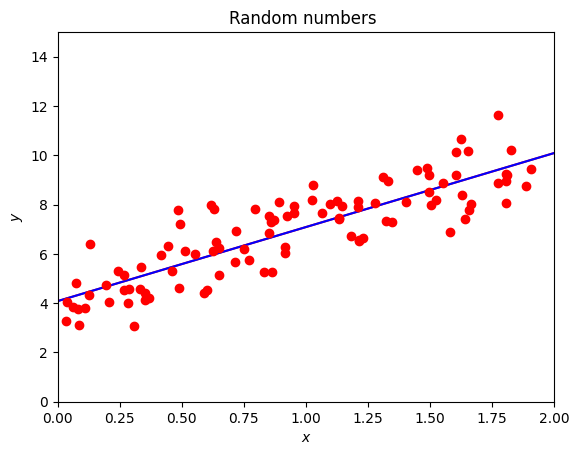

In [14]:
# Importing various packages
from math import exp, sqrt
from random import random, seed
import numpy as np
import matplotlib.pyplot as plt

n = 100
x = 2*np.random.rand(n,1)
y = 4+3*x+np.random.randn(n,1)

X = np.c_[np.ones((n,1)), x]
XT_X = X.T @ X
theta_linreg = np.linalg.inv(X.T @ X) @ (X.T @ y)
print("Own inversion")
print(theta_linreg)
# Hessian matrix
H = (2.0/n)* XT_X
EigValues, EigVectors = np.linalg.eig(H)
print(f"Eigenvalues of Hessian Matrix:{EigValues}")

theta = np.random.randn(2,1)
eta = 1.0/np.max(EigValues)
Niterations = 1000


for iter in range(Niterations):
    gradients = 2.0/n*X.T @ ((X @ theta)-y)
    theta -= eta*gradients
print("theta from own gd")
print(theta)

xnew = np.array([[0],[2]])
Xnew = np.c_[np.ones((2,1)), xnew]
ypredict = Xnew.dot(theta)
ypredict2 = Xnew.dot(theta_linreg)

n_epochs = 50
M = 5   #size of each minibatch
m = int(n/M) #number of minibatches
t0, t1 = 5, 50

def learning_schedule(t):
    return t0/(t+t1)

theta = np.random.randn(2,1)

for epoch in range(n_epochs):
# Can you figure out a better way of setting up the contributions to each batch?
    for i in range(m):
        random_index = M*np.random.randint(m)
        xi = X[random_index:random_index+M]
        yi = y[random_index:random_index+M]
        gradients = (2.0/M)* xi.T @ ((xi @ theta)-yi)
        eta = learning_schedule(epoch*m+i)
        theta = theta - eta*gradients
print("theta from own sdg")
print(theta)

plt.plot(xnew, ypredict, "r-")
plt.plot(xnew, ypredict2, "b-")
plt.plot(x, y ,'ro')
plt.axis([0,2.0,0, 15.0])
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title(r'Random numbers ')
plt.show()

## Replace or not

In the above code, we have use replacement in setting up the
mini-batches. The discussion
[here](https://sebastianraschka.com/faq/docs/sgd-methods.html) may be
useful.

## Momentum based GD

The stochastic gradient descent (SGD) is almost always used with a
*momentum* or inertia term that serves as a memory of the direction we
are moving in parameter space.  This is typically implemented as
follows

$$
\mathbf{v}_{t}=\gamma \mathbf{v}_{t-1}+\eta_{t}\nabla_\theta E(\boldsymbol{\theta}_t) \nonumber
$$

<!-- Equation labels as ordinary links -->
<div id="_auto1"></div>

$$
\begin{equation} 
\boldsymbol{\theta}_{t+1}= \boldsymbol{\theta}_t -\mathbf{v}_{t},
\label{_auto1} \tag{2}
\end{equation}
$$

where we have introduced a momentum parameter $\gamma$, with
$0\le\gamma\le 1$, and for brevity we dropped the explicit notation to
indicate the gradient is to be taken over a different mini-batch at
each step. We call this algorithm gradient descent with momentum
(GDM). From these equations, it is clear that $\mathbf{v}_t$ is a
running average of recently encountered gradients and
$(1-\gamma)^{-1}$ sets the characteristic time scale for the memory
used in the averaging procedure. Consistent with this, when
$\gamma=0$, this just reduces down to ordinary SGD as discussed
earlier. An equivalent way of writing the updates is

$$
\Delta \boldsymbol{\theta}_{t+1} = \gamma \Delta \boldsymbol{\theta}_t -\ \eta_{t}\nabla_\theta E(\boldsymbol{\theta}_t),
$$

where we have defined $\Delta \boldsymbol{\theta}_{t}= \boldsymbol{\theta}_t-\boldsymbol{\theta}_{t-1}$.

## More on momentum based approaches

Let us try to get more intuition from these equations. It is helpful
to consider a simple physical analogy with a particle of mass $m$
moving in a viscous medium with drag coefficient $\mu$ and potential
$E(\mathbf{w})$. If we denote the particle's position by $\mathbf{w}$,
then its motion is described by

$$
m {d^2 \mathbf{w} \over dt^2} + \mu {d \mathbf{w} \over dt }= -\nabla_w E(\mathbf{w}).
$$

We can discretize this equation in the usual way to get

$$
m { \mathbf{w}_{t+\Delta t}-2 \mathbf{w}_{t} +\mathbf{w}_{t-\Delta t} \over (\Delta t)^2}+\mu {\mathbf{w}_{t+\Delta t}- \mathbf{w}_{t} \over \Delta t} = -\nabla_w E(\mathbf{w}).
$$

Rearranging this equation, we can rewrite this as

$$
\Delta \mathbf{w}_{t +\Delta t}= - { (\Delta t)^2 \over m +\mu \Delta t} \nabla_w E(\mathbf{w})+ {m \over m +\mu \Delta t} \Delta \mathbf{w}_t.
$$

## Momentum parameter

Notice that this equation is identical to previous one if we identify
the position of the particle, $\mathbf{w}$, with the parameters
$\boldsymbol{\theta}$. This allows us to identify the momentum
parameter and learning rate with the mass of the particle and the
viscous drag as:

$$
\gamma= {m \over m +\mu \Delta t }, \qquad \eta = {(\Delta t)^2 \over m +\mu \Delta t}.
$$

Thus, as the name suggests, the momentum parameter is proportional to
the mass of the particle and effectively provides inertia.
Furthermore, in the large viscosity/small learning rate limit, our
memory time scales as $(1-\gamma)^{-1} \approx m/(\mu \Delta t)$.

Why is momentum useful? SGD momentum helps the gradient descent
algorithm gain speed in directions with persistent but small gradients
even in the presence of stochasticity, while suppressing oscillations
in high-curvature directions. This becomes especially important in
situations where the landscape is shallow and flat in some directions
and narrow and steep in others. It has been argued that first-order
methods (with appropriate initial conditions) can perform comparable
to more expensive second order methods, especially in the context of
complex deep learning models.

These beneficial properties of momentum can sometimes become even more
pronounced by using a slight modification of the classical momentum
algorithm called Nesterov Accelerated Gradient (NAG).

In the NAG algorithm, rather than calculating the gradient at the
current parameters, $\nabla_\theta E(\boldsymbol{\theta}_t)$, one
calculates the gradient at the expected value of the parameters given
our current momentum, $\nabla_\theta E(\boldsymbol{\theta}_t +\gamma
\mathbf{v}_{t-1})$. This yields the NAG update rule

$$
\mathbf{v}_{t}=\gamma \mathbf{v}_{t-1}+\eta_{t}\nabla_\theta E(\boldsymbol{\theta}_t +\gamma \mathbf{v}_{t-1}) \nonumber
$$

<!-- Equation labels as ordinary links -->
<div id="_auto2"></div>

$$
\begin{equation} 
\boldsymbol{\theta}_{t+1}= \boldsymbol{\theta}_t -\mathbf{v}_{t}.
\label{_auto2} \tag{3}
\end{equation}
$$

One of the major advantages of NAG is that it allows for the use of a larger learning rate than GDM for the same choice of $\gamma$.

## Second moment of the gradient

In stochastic gradient descent, with and without momentum, we still
have to specify a schedule for tuning the learning rates $\eta_t$
as a function of time.  As discussed in the context of Newton's
method, this presents a number of dilemmas. The learning rate is
limited by the steepest direction which can change depending on the
current position in the landscape. To circumvent this problem, ideally
our algorithm would keep track of curvature and take large steps in
shallow, flat directions and small steps in steep, narrow directions.
Second-order methods accomplish this by calculating or approximating
the Hessian and normalizing the learning rate by the
curvature. However, this is very computationally expensive for
extremely large models. Ideally, we would like to be able to
adaptively change the step size to match the landscape without paying
the steep computational price of calculating or approximating
Hessians.

Recently, a number of methods have been introduced that accomplish
this by tracking not only the gradient, but also the second moment of
the gradient. These methods include AdaGrad, AdaDelta, Root Mean Squared Propagation (RMS-Prop), and
[ADAM](https://arxiv.org/abs/1412.6980).

## RMS prop

In RMS prop, in addition to keeping a running average of the first
moment of the gradient, we also keep track of the second moment
denoted by $\mathbf{s}_t=\mathbb{E}[\mathbf{g}_t^2]$. The update rule
for RMS prop is given by

<!-- Equation labels as ordinary links -->
<div id="_auto3"></div>

$$
\begin{equation}
\mathbf{g}_t = \nabla_\theta E(\boldsymbol{\theta}) 
\label{_auto3} \tag{4}
\end{equation}
$$

$$
\mathbf{s}_t =\beta \mathbf{s}_{t-1} +(1-\beta)\mathbf{g}_t^2 \nonumber
$$

$$
\boldsymbol{\theta}_{t+1}=\boldsymbol{\theta}_t - \eta_t { \mathbf{g}_t \over \sqrt{\mathbf{s}_t +\epsilon}}, \nonumber
$$

where $\beta$ controls the averaging time of the second moment and is
typically taken to be about $\beta=0.9$, $\eta_t$ is a learning rate
typically chosen to be $10^{-3}$, and $\epsilon\sim 10^{-8} $ is a
small regularization constant to prevent divergences. Multiplication
and division by vectors is understood as an element-wise operation. It
is clear from this formula that the learning rate is reduced in
directions where the norm of the gradient is consistently large. This
greatly speeds up the convergence by allowing us to use a larger
learning rate for flat directions.

## [ADAM optimizer](https://arxiv.org/abs/1412.6980)

A related algorithm is the ADAM optimizer. In
[ADAM](https://arxiv.org/abs/1412.6980), we keep a running average of
both the first and second moment of the gradient and use this
information to adaptively change the learning rate for different
parameters.  The method isefficient when working with large
problems involving lots data and/or parameters.  It is a combination of the
gradient descent with momentum algorithm and the RMSprop algorithm
discussed above.

In addition to keeping a running average of the first and
second moments of the gradient
(i.e. $\mathbf{m}_t=\mathbb{E}[\mathbf{g}_t]$ and
$\mathbf{s}_t=\mathbb{E}[\mathbf{g}^2_t]$, respectively), ADAM
performs an additional bias correction to account for the fact that we
are estimating the first two moments of the gradient using a running
average (denoted by the hats in the update rule below). The update
rule for ADAM is given by (where multiplication and division are once
again understood to be element-wise operations below)

<!-- Equation labels as ordinary links -->
<div id="_auto4"></div>

$$
\begin{equation}
\mathbf{g}_t = \nabla_\theta E(\boldsymbol{\theta}) 
\label{_auto4} \tag{5}
\end{equation}
$$

$$
\mathbf{m}_t = \beta_1 \mathbf{m}_{t-1} + (1-\beta_1) \mathbf{g}_t \nonumber
$$

$$
\mathbf{s}_t =\beta_2 \mathbf{s}_{t-1} +(1-\beta_2)\mathbf{g}_t^2 \nonumber
$$

$$
\boldsymbol{\mathbf{m}}_t={\mathbf{m}_t \over 1-\beta_1^t} \nonumber
$$

$$
\boldsymbol{\mathbf{s}}_t ={\mathbf{s}_t \over1-\beta_2^t} \nonumber
$$

$$
\boldsymbol{\theta}_{t+1}=\boldsymbol{\theta}_t - \eta_t { \boldsymbol{\mathbf{m}}_t \over \sqrt{\boldsymbol{\mathbf{s}}_t} +\epsilon}, \nonumber
$$

<!-- Equation labels as ordinary links -->
<div id="_auto5"></div>

$$
\begin{equation} 
\label{_auto5} \tag{6}
\end{equation}
$$

where $\beta_1$ and $\beta_2$ set the memory lifetime of the first and
second moment and are typically taken to be $0.9$ and $0.99$
respectively, and $\eta$ and $\epsilon$ are identical to RMSprop.

Like in RMSprop, the effective step size of a parameter depends on the
magnitude of its gradient squared.  To understand this better, let us
rewrite this expression in terms of the variance
$\boldsymbol{\sigma}_t^2 = \boldsymbol{\mathbf{s}}_t -
(\boldsymbol{\mathbf{m}}_t)^2$. Consider a single parameter $\theta_t$. The
update rule for this parameter is given by

$$
\Delta \theta_{t+1}= -\eta_t { \boldsymbol{m}_t \over \sqrt{\sigma_t^2 +  m_t^2 }+\epsilon}.
$$

## Algorithms and codes for Adagrad, RMSprop and Adam

The algorithms we have implemented are well described in the text by [Goodfellow, Bengio and Courville, chapter 8](https://www.deeplearningbook.org/contents/optimization.html).

The codes which implement these algorithms are discussed after our presentation of automatic differentiation.

## Practical tips

* **Randomize the data when making mini-batches**. It is always important to randomly shuffle the data when forming mini-batches. Otherwise, the gradient descent method can fit spurious correlations resulting from the order in which data is presented.

* **Transform your inputs**. Learning becomes difficult when our landscape has a mixture of steep and flat directions. One simple trick for minimizing these situations is to standardize the data by subtracting the mean and normalizing the variance of input variables. Whenever possible, also decorrelate the inputs. To understand why this is helpful, consider the case of linear regression. It is easy to show that for the squared error cost function, the Hessian of the cost function is just the correlation matrix between the inputs. Thus, by standardizing the inputs, we are ensuring that the landscape looks homogeneous in all directions in parameter space. Since most deep networks can be viewed as linear transformations followed by a non-linearity at each layer, we expect this intuition to hold beyond the linear case.

* **Monitor the out-of-sample performance.** Always monitor the performance of your model on a validation set (a small portion of the training data that is held out of the training process to serve as a proxy for the test set. If the validation error starts increasing, then the model is beginning to overfit. Terminate the learning process. This *early stopping* significantly improves performance in many settings.

* **Adaptive optimization methods don't always have good generalization.** Recent studies have shown that adaptive methods such as ADAM, RMSPorp, and AdaGrad tend to have poor generalization compared to SGD or SGD with momentum, particularly in the high-dimensional limit (i.e. the number of parameters exceeds the number of data points). Although it is not clear at this stage why these methods perform so well in training deep neural networks, simpler procedures like properly-tuned SGD may work as well or better in these applications.

Geron's text, see chapter 11, has several interesting discussions.

## Automatic differentiation

[Automatic differentiation (AD)](https://en.wikipedia.org/wiki/Automatic_differentiation), 
also called algorithmic
differentiation or computational differentiation,is a set of
techniques to numerically evaluate the derivative of a function
specified by a computer program. AD exploits the fact that every
computer program, no matter how complicated, executes a sequence of
elementary arithmetic operations (addition, subtraction,
multiplication, division, etc.) and elementary functions (exp, log,
sin, cos, etc.). By applying the chain rule repeatedly to these
operations, derivatives of arbitrary order can be computed
automatically, accurately to working precision, and using at most a
small constant factor more arithmetic operations than the original
program.

Automatic differentiation is neither:

* Symbolic differentiation, nor

* Numerical differentiation (the method of finite differences).

Symbolic differentiation can lead to inefficient code and faces the
difficulty of converting a computer program into a single expression,
while numerical differentiation can introduce round-off errors in the
discretization process and cancellation

Python has tools for so-called **automatic differentiation**.
Consider the following example

$$
f(x) = \sin\left(2\pi x + x^2\right)
$$

which has the following derivative

$$
f'(x) = \cos\left(2\pi x + x^2\right)\left(2\pi + 2x\right)
$$

Using **autograd** we have

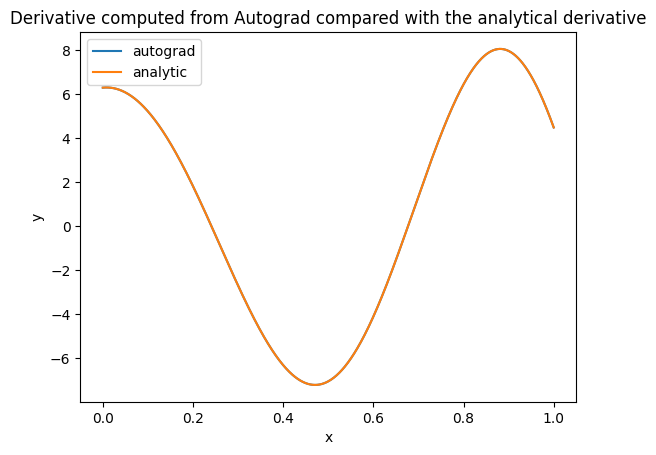

The max absolute difference is: 1.77636e-15


In [15]:
import autograd.numpy as np

# To do elementwise differentiation:
from autograd import elementwise_grad as egrad 

# To plot:
import matplotlib.pyplot as plt 


def f(x):
    return np.sin(2*np.pi*x + x**2)

def f_grad_analytic(x):
    return np.cos(2*np.pi*x + x**2)*(2*np.pi + 2*x)

# Do the comparison:
x = np.linspace(0,1,1000)

f_grad = egrad(f)

computed = f_grad(x)
analytic = f_grad_analytic(x)

plt.title('Derivative computed from Autograd compared with the analytical derivative')
plt.plot(x,computed,label='autograd')
plt.plot(x,analytic,label='analytic')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.show()

print("The max absolute difference is: %g"%(np.max(np.abs(computed - analytic))))

## Using autograd

Here we
experiment with what kind of functions Autograd is capable
of finding the gradient of. The following Python functions are just
meant to illustrate what Autograd can do, but please feel free to
experiment with other, possibly more complicated, functions as well.

In [16]:
import autograd.numpy as np
from autograd import grad

def f1(x):
    return x**3 + 1

f1_grad = grad(f1)

# Remember to send in float as argument to the computed gradient from Autograd!
a = 1.0

# See the evaluated gradient at a using autograd:
print("The gradient of f1 evaluated at a = %g using autograd is: %g"%(a,f1_grad(a)))

# Compare with the analytical derivative, that is f1'(x) = 3*x**2 
grad_analytical = 3*a**2
print("The gradient of f1 evaluated at a = %g by finding the analytic expression is: %g"%(a,grad_analytical))

The gradient of f1 evaluated at a = 1 using autograd is: 3
The gradient of f1 evaluated at a = 1 by finding the analytic expression is: 3


## Autograd with more complicated functions

To differentiate with respect to two (or more) arguments of a Python
function, Autograd need to know at which variable the function if
being differentiated with respect to.

In [17]:
import autograd.numpy as np
from autograd import grad
def f2(x1,x2):
    return 3*x1**3 + x2*(x1 - 5) + 1

# By sending the argument 0, Autograd will compute the derivative w.r.t the first variable, in this case x1
f2_grad_x1 = grad(f2,0)

# ... and differentiate w.r.t x2 by sending 1 as an additional arugment to grad
f2_grad_x2 = grad(f2,1)

x1 = 1.0
x2 = 3.0 

print("Evaluating at x1 = %g, x2 = %g"%(x1,x2))
print("-"*30)

# Compare with the analytical derivatives:

# Derivative of f2 w.r.t x1 is: 9*x1**2 + x2:
f2_grad_x1_analytical = 9*x1**2 + x2

# Derivative of f2 w.r.t x2 is: x1 - 5:
f2_grad_x2_analytical = x1 - 5

# See the evaluated derivations:
print("The derivative of f2 w.r.t x1: %g"%( f2_grad_x1(x1,x2) ))
print("The analytical derivative of f2 w.r.t x1: %g"%( f2_grad_x1(x1,x2) ))

print()

print("The derivative of f2 w.r.t x2: %g"%( f2_grad_x2(x1,x2) ))
print("The analytical derivative of f2 w.r.t x2: %g"%( f2_grad_x2(x1,x2) ))

Evaluating at x1 = 1, x2 = 3
------------------------------
The derivative of f2 w.r.t x1: 12
The analytical derivative of f2 w.r.t x1: 12

The derivative of f2 w.r.t x2: -4
The analytical derivative of f2 w.r.t x2: -4


Note that the grad function will not produce the true gradient of the function. The true gradient of a function with two or more variables will produce a vector, where each element is the function differentiated w.r.t a variable.

## More complicated functions using the elements of their arguments directly

In [18]:
import autograd.numpy as np
from autograd import grad
def f3(x): # Assumes x is an array of length 5 or higher
    return 2*x[0] + 3*x[1] + 5*x[2] + 7*x[3] + 11*x[4]**2

f3_grad = grad(f3)

x = np.linspace(0,4,5)

# Print the computed gradient:
print("The computed gradient of f3 is: ", f3_grad(x))

# The analytical gradient is: (2, 3, 5, 7, 22*x[4])
f3_grad_analytical = np.array([2, 3, 5, 7, 22*x[4]])

# Print the analytical gradient:
print("The analytical gradient of f3 is: ", f3_grad_analytical)

The computed gradient of f3 is:  [ 2.  3.  5.  7. 88.]
The analytical gradient of f3 is:  [ 2.  3.  5.  7. 88.]


Note that in this case, when sending an array as input argument, the
output from Autograd is another array. This is the true gradient of
the function, as opposed to the function in the previous example. By
using arrays to represent the variables, the output from Autograd
might be easier to work with, as the output is closer to what one
could expect form a gradient-evaluting function.

## Functions using mathematical functions from Numpy

In [19]:
import autograd.numpy as np
from autograd import grad
def f4(x):
    return np.sqrt(1+x**2) + np.exp(x) + np.sin(2*np.pi*x)

f4_grad = grad(f4)

x = 2.7

# Print the computed derivative:
print("The computed derivative of f4 at x = %g is: %g"%(x,f4_grad(x)))

# The analytical derivative is: x/sqrt(1 + x**2) + exp(x) + cos(2*pi*x)*2*pi
f4_grad_analytical = x/np.sqrt(1 + x**2) + np.exp(x) + np.cos(2*np.pi*x)*2*np.pi

# Print the analytical gradient:
print("The analytical gradient of f4 at x = %g is: %g"%(x,f4_grad_analytical))

The computed derivative of f4 at x = 2.7 is: 13.8759
The analytical gradient of f4 at x = 2.7 is: 13.8759


## More autograd

In [20]:
import autograd.numpy as np
from autograd import grad
def f5(x):
    if x >= 0:
        return x**2
    else:
        return -3*x + 1

f5_grad = grad(f5)

x = 2.7

# Print the computed derivative:
print("The computed derivative of f5 at x = %g is: %g"%(x,f5_grad(x)))

The computed derivative of f5 at x = 2.7 is: 5.4


## And  with loops

In [21]:
import autograd.numpy as np
from autograd import grad
def f6_for(x):
    val = 0
    for i in range(10):
        val = val + x**i
    return val

def f6_while(x):
    val = 0
    i = 0
    while i < 10:
        val = val + x**i
        i = i + 1
    return val

f6_for_grad = grad(f6_for)
f6_while_grad = grad(f6_while)

x = 0.5

# Print the computed derivaties of f6_for and f6_while
print("The computed derivative of f6_for at x = %g is: %g"%(x,f6_for_grad(x)))
print("The computed derivative of f6_while at x = %g is: %g"%(x,f6_while_grad(x)))

The computed derivative of f6_for at x = 0.5 is: 3.95703
The computed derivative of f6_while at x = 0.5 is: 3.95703


In [22]:
import autograd.numpy as np
from autograd import grad
# Both of the functions are implementation of the sum: sum(x**i) for i = 0, ..., 9
# The analytical derivative is: sum(i*x**(i-1)) 
f6_grad_analytical = 0
for i in range(10):
    f6_grad_analytical += i*x**(i-1)

print("The analytical derivative of f6 at x = %g is: %g"%(x,f6_grad_analytical))

The analytical derivative of f6 at x = 0.5 is: 3.95703


## Using recursion

In [23]:
import autograd.numpy as np
from autograd import grad

def f7(n): # Assume that n is an integer
    if n == 1 or n == 0:
        return 1
    else:
        return n*f7(n-1)

f7_grad = grad(f7)

n = 2.0

print("The computed derivative of f7 at n = %d is: %g"%(n,f7_grad(n)))

# The function f7 is an implementation of the factorial of n.
# By using the product rule, one can find that the derivative is:

f7_grad_analytical = 0
for i in range(int(n)-1):
    tmp = 1
    for k in range(int(n)-1):
        if k != i:
            tmp *= (n - k)
    f7_grad_analytical += tmp

print("The analytical derivative of f7 at n = %d is: %g"%(n,f7_grad_analytical))

The computed derivative of f7 at n = 2 is: 1
The analytical derivative of f7 at n = 2 is: 1


Note that if n is equal to zero or one, Autograd will give an error message. This message appears when the output is independent on input.

## Unsupported functions
Autograd supports many features. However, there are some functions that is not supported (yet) by Autograd.

Assigning a value to the variable being differentiated with respect to

In [24]:
import autograd.numpy as np
from autograd import grad
def f8(x): # Assume x is an array
    x[2] = 3
    return x*2

#f8_grad = grad(f8)

#x = 8.4

#print("The derivative of f8 is:",f8_grad(x))

Here, running this code, Autograd tells us that an 'ArrayBox' does not support item assignment. The item assignment is done when the program tries to assign x[2] to the value 3. However, Autograd has implemented the computation of the derivative such that this assignment is not possible.

## The syntax a.dot(b) when finding the dot product

In [25]:
import autograd.numpy as np
from autograd import grad
def f9(a): # Assume a is an array with 2 elements
    b = np.array([1.0,2.0])
    return a.dot(b)

#f9_grad = grad(f9)

#x = np.array([1.0,0.0])

#print("The derivative of f9 is:",f9_grad(x))

Here we are told that the 'dot' function does not belong to Autograd's
version of a Numpy array.  To overcome this, an alternative syntax
which also computed the dot product can be used:

In [26]:
import autograd.numpy as np
from autograd import grad
def f9_alternative(x): # Assume a is an array with 2 elements
    b = np.array([1.0,2.0])
    return np.dot(x,b) # The same as x_1*b_1 + x_2*b_2

f9_alternative_grad = grad(f9_alternative)

x = np.array([3.0,0.0])

print("The gradient of f9 is:",f9_alternative_grad(x))

# The analytical gradient of the dot product of vectors x and b with two elements (x_1,x_2) and (b_1, b_2) respectively
# w.r.t x is (b_1, b_2).

The gradient of f9 is: [1. 2.]


## Using Autograd with OLS

We conclude the part on optmization by showing how we can make codes
for linear regression and logistic regression using **autograd**. The
first example shows results with ordinary leats squares.

Own inversion
[[3.94499279]
 [3.03306538]]
Eigenvalues of Hessian Matrix:[0.31248425 4.44418124]
theta from own gd
[[3.94499279]
 [3.03306538]]


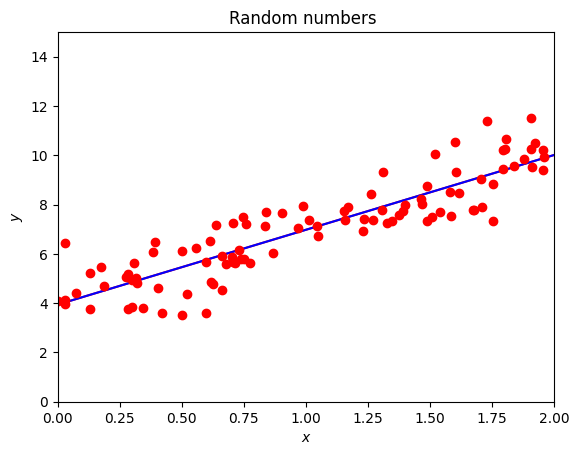

In [27]:
# Using Autograd to calculate gradients for OLS
from random import random, seed
import numpy as np
import autograd.numpy as np
import matplotlib.pyplot as plt
from autograd import grad

def CostOLS(beta):
    return (1.0/n)*np.sum((y-X @ beta)**2)

n = 100
x = 2*np.random.rand(n,1)
y = 4+3*x+np.random.randn(n,1)

X = np.c_[np.ones((n,1)), x]
XT_X = X.T @ X
theta_linreg = np.linalg.pinv(XT_X) @ (X.T @ y)
print("Own inversion")
print(theta_linreg)
# Hessian matrix
H = (2.0/n)* XT_X
EigValues, EigVectors = np.linalg.eig(H)
print(f"Eigenvalues of Hessian Matrix:{EigValues}")

theta = np.random.randn(2,1)
eta = 1.0/np.max(EigValues)
Niterations = 1000
# define the gradient
training_gradient = grad(CostOLS)

for iter in range(Niterations):
    gradients = training_gradient(theta)
    theta -= eta*gradients
print("theta from own gd")
print(theta)

xnew = np.array([[0],[2]])
Xnew = np.c_[np.ones((2,1)), xnew]
ypredict = Xnew.dot(theta)
ypredict2 = Xnew.dot(theta_linreg)

plt.plot(xnew, ypredict, "r-")
plt.plot(xnew, ypredict2, "b-")
plt.plot(x, y ,'ro')
plt.axis([0,2.0,0, 15.0])
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title(r'Random numbers ')
plt.show()

## Same code but now with momentum gradient descent

In [28]:
# Using Autograd to calculate gradients for OLS
from random import random, seed
import numpy as np
import autograd.numpy as np
import matplotlib.pyplot as plt
from autograd import grad

def CostOLS(beta):
    return (1.0/n)*np.sum((y-X @ beta)**2)

n = 100
x = 2*np.random.rand(n,1)
y = 4+3*x#+np.random.randn(n,1)

X = np.c_[np.ones((n,1)), x]
XT_X = X.T @ X
theta_linreg = np.linalg.pinv(XT_X) @ (X.T @ y)
print("Own inversion")
print(theta_linreg)
# Hessian matrix
H = (2.0/n)* XT_X
EigValues, EigVectors = np.linalg.eig(H)
print(f"Eigenvalues of Hessian Matrix:{EigValues}")

theta = np.random.randn(2,1)
eta = 1.0/np.max(EigValues)
Niterations = 30

# define the gradient
training_gradient = grad(CostOLS)

for iter in range(Niterations):
    gradients = training_gradient(theta)
    theta -= eta*gradients
    print(iter,gradients[0],gradients[1])
print("theta from own gd")
print(theta)

# Now improve with momentum gradient descent
change = 0.0
delta_momentum = 0.3
for iter in range(Niterations):
    # calculate gradient
    gradients = training_gradient(theta)
    # calculate update
    new_change = eta*gradients+delta_momentum*change
    # take a step
    theta -= new_change
    # save the change
    change = new_change
    print(iter,gradients[0],gradients[1])
print("theta from own gd wth momentum")
print(theta)

Own inversion
[[4.]
 [3.]]
Eigenvalues of Hessian Matrix:[0.30306759 4.65944342]
0 [-20.62275788] [-25.73690387]
1 [-0.03662823] [0.02925855]
2 [-0.0342458] [0.02735547]
3 [-0.03201832] [0.02557617]
4 [-0.02993573] [0.0239126]
5 [-0.0279886] [0.02235723]
6 [-0.02616812] [0.02090304]
7 [-0.02446604] [0.01954342]
8 [-0.02287468] [0.01827225]
9 [-0.02138683] [0.01708375]
10 [-0.01999575] [0.01597256]
11 [-0.01869515] [0.01493365]
12 [-0.01747915] [0.01396231]
13 [-0.01634224] [0.01305415]
14 [-0.01527928] [0.01220505]
15 [-0.01428546] [0.01141119]
16 [-0.01335628] [0.01066897]
17 [-0.01248754] [0.00997502]
18 [-0.0116753] [0.0093262]
19 [-0.01091589] [0.00871959]
20 [-0.01020588] [0.00815244]
21 [-0.00954206] [0.00762217]
22 [-0.0089214] [0.0071264]
23 [-0.00834112] [0.00666287]
24 [-0.00779859] [0.00622949]
25 [-0.00729134] [0.0058243]
26 [-0.00681708] [0.00544547]
27 [-0.00637367] [0.00509128]
28 [-0.0059591] [0.00476012]
29 [-0.0055715] [0.0044505]
theta from own gd
[[3.98281205]
 [3.0

## But none of these can compete with Newton's method

In [29]:
# Using Newton's method
from random import random, seed
import numpy as np
import autograd.numpy as np
import matplotlib.pyplot as plt
from autograd import grad

def CostOLS(beta):
    return (1.0/n)*np.sum((y-X @ beta)**2)

n = 100
x = 2*np.random.rand(n,1)
y = 4+3*x+np.random.randn(n,1)

X = np.c_[np.ones((n,1)), x]
XT_X = X.T @ X
beta_linreg = np.linalg.pinv(XT_X) @ (X.T @ y)
print("Own inversion")
print(beta_linreg)
# Hessian matrix
H = (2.0/n)* XT_X
# Note that here the Hessian does not depend on the parameters beta
invH = np.linalg.pinv(H)
EigValues, EigVectors = np.linalg.eig(H)
print(f"Eigenvalues of Hessian Matrix:{EigValues}")

beta = np.random.randn(2,1)
Niterations = 5

# define the gradient
training_gradient = grad(CostOLS)

for iter in range(Niterations):
    gradients = training_gradient(beta)
    beta -= invH @ gradients
    print(iter,gradients[0],gradients[1])
print("beta from own Newton code")
print(beta)

Own inversion
[[4.26281735]
 [2.84478178]]
Eigenvalues of Hessian Matrix:[0.33978889 4.51659846]
0 [-14.67490857] [-18.08539155]
1 [-4.46170878e-15] [-1.45781905e-14]
2 [-1.21430643e-15] [-1.24768421e-15]
3 [4.92661467e-16] [4.50610071e-16]
4 [4.92661467e-16] [4.50610071e-16]
beta from own Newton code
[[4.26281735]
 [2.84478178]]


## Including Stochastic Gradient Descent with Autograd
In this code we include the stochastic gradient descent approach discussed above. Note here that we specify which argument we are taking the derivative with respect to when using **autograd**.

Own inversion
[[4.0586484]
 [3.0718316]]
Eigenvalues of Hessian Matrix:[0.29860173 3.8931686 ]
theta from own gd
[[4.0586484]
 [3.0718316]]


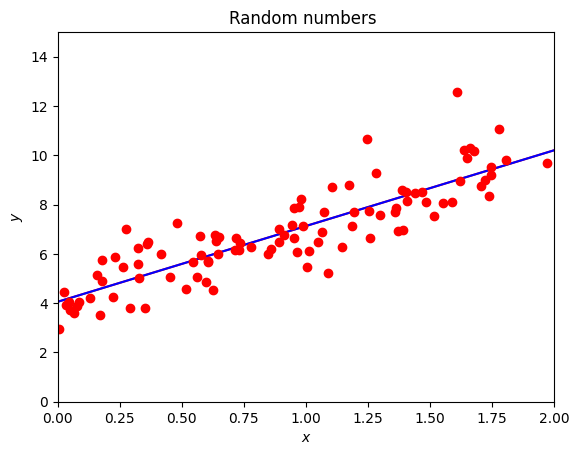

theta from own sdg


[[4.02496085]
 [3.12081773]]


In [30]:
# Using Autograd to calculate gradients using SGD
# OLS example
from random import random, seed
import numpy as np
import autograd.numpy as np
import matplotlib.pyplot as plt
from autograd import grad

# Note change from previous example
def CostOLS(y,X,theta):
    return np.sum((y-X @ theta)**2)

n = 100
x = 2*np.random.rand(n,1)
y = 4+3*x+np.random.randn(n,1)

X = np.c_[np.ones((n,1)), x]
XT_X = X.T @ X
theta_linreg = np.linalg.pinv(XT_X) @ (X.T @ y)
print("Own inversion")
print(theta_linreg)
# Hessian matrix
H = (2.0/n)* XT_X
EigValues, EigVectors = np.linalg.eig(H)
print(f"Eigenvalues of Hessian Matrix:{EigValues}")

theta = np.random.randn(2,1)
eta = 1.0/np.max(EigValues)
Niterations = 1000

# Note that we request the derivative wrt third argument (theta, 2 here)
training_gradient = grad(CostOLS,2)

for iter in range(Niterations):
    gradients = (1.0/n)*training_gradient(y, X, theta)
    theta -= eta*gradients
print("theta from own gd")
print(theta)

xnew = np.array([[0],[2]])
Xnew = np.c_[np.ones((2,1)), xnew]
ypredict = Xnew.dot(theta)
ypredict2 = Xnew.dot(theta_linreg)

plt.plot(xnew, ypredict, "r-")
plt.plot(xnew, ypredict2, "b-")
plt.plot(x, y ,'ro')
plt.axis([0,2.0,0, 15.0])
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title(r'Random numbers ')
plt.show()

n_epochs = 50
M = 5   #size of each minibatch
m = int(n/M) #number of minibatches
t0, t1 = 5, 50
def learning_schedule(t):
    return t0/(t+t1)

theta = np.random.randn(2,1)

for epoch in range(n_epochs):
# Can you figure out a better way of setting up the contributions to each batch?
    for i in range(m):
        random_index = M*np.random.randint(m)
        xi = X[random_index:random_index+M]
        yi = y[random_index:random_index+M]
        gradients = (1.0/M)*training_gradient(yi, xi, theta)
        eta = learning_schedule(epoch*m+i)
        theta = theta - eta*gradients
print("theta from own sdg")
print(theta)

## Same code but now with momentum gradient descent

In [31]:
# Using Autograd to calculate gradients using SGD
# OLS example
from random import random, seed
import numpy as np
import autograd.numpy as np
import matplotlib.pyplot as plt
from autograd import grad

# Note change from previous example
def CostOLS(y,X,theta):
    return np.sum((y-X @ theta)**2)

n = 100
x = 2*np.random.rand(n,1)
y = 4+3*x+np.random.randn(n,1)

X = np.c_[np.ones((n,1)), x]
XT_X = X.T @ X
theta_linreg = np.linalg.pinv(XT_X) @ (X.T @ y)
print("Own inversion")
print(theta_linreg)
# Hessian matrix
H = (2.0/n)* XT_X
EigValues, EigVectors = np.linalg.eig(H)
print(f"Eigenvalues of Hessian Matrix:{EigValues}")

theta = np.random.randn(2,1)
eta = 1.0/np.max(EigValues)
Niterations = 100

# Note that we request the derivative wrt third argument (theta, 2 here)
training_gradient = grad(CostOLS,2)

for iter in range(Niterations):
    gradients = (1.0/n)*training_gradient(y, X, theta)
    theta -= eta*gradients
print("theta from own gd")
print(theta)


n_epochs = 50
M = 5   #size of each minibatch
m = int(n/M) #number of minibatches
t0, t1 = 5, 50
def learning_schedule(t):
    return t0/(t+t1)

theta = np.random.randn(2,1)

change = 0.0
delta_momentum = 0.3

for epoch in range(n_epochs):
    for i in range(m):
        random_index = M*np.random.randint(m)
        xi = X[random_index:random_index+M]
        yi = y[random_index:random_index+M]
        gradients = (1.0/M)*training_gradient(yi, xi, theta)
        eta = learning_schedule(epoch*m+i)
        # calculate update
        new_change = eta*gradients+delta_momentum*change
        # take a step
        theta -= new_change
        # save the change
        change = new_change
print("theta from own sdg with momentum")
print(theta)

Own inversion
[[3.96075051]
 [3.02148021]]
Eigenvalues of Hessian Matrix:[0.27470622 4.24106503]
theta from own gd
[[3.95906059]
 [3.02296298]]
theta from own sdg with momentum
[[3.95611042]
 [2.99475306]]


## Similar (second order function now) problem but now with AdaGrad

In [32]:
# Using Autograd to calculate gradients using AdaGrad and Stochastic Gradient descent
# OLS example
from random import random, seed
import numpy as np
import autograd.numpy as np
import matplotlib.pyplot as plt
from autograd import grad

# Note change from previous example
def CostOLS(y,X,theta):
    return np.sum((y-X @ theta)**2)

n = 1000
x = np.random.rand(n,1)
y = 2.0+3*x +4*x*x

X = np.c_[np.ones((n,1)), x, x*x]
XT_X = X.T @ X
theta_linreg = np.linalg.pinv(XT_X) @ (X.T @ y)
print("Own inversion")
print(theta_linreg)


# Note that we request the derivative wrt third argument (theta, 2 here)
training_gradient = grad(CostOLS,2)
# Define parameters for Stochastic Gradient Descent
n_epochs = 50
M = 5   #size of each minibatch
m = int(n/M) #number of minibatches
# Guess for unknown parameters theta
theta = np.random.randn(3,1)

# Value for learning rate
eta = 0.01
# Including AdaGrad parameter to avoid possible division by zero
delta  = 1e-8
for epoch in range(n_epochs):
    Giter = 0.0
    for i in range(m):
        random_index = M*np.random.randint(m)
        xi = X[random_index:random_index+M]
        yi = y[random_index:random_index+M]
        gradients = (1.0/M)*training_gradient(yi, xi, theta)
        Giter += gradients*gradients
        update = gradients*eta/(delta+np.sqrt(Giter))
        theta -= update
print("theta from own AdaGrad")
print(theta)

Own inversion
[[2.]
 [3.]
 [4.]]


theta from own AdaGrad
[[2.00025662]
 [2.99802696]
 [4.00167329]]


Running this code we note an almost perfect agreement with the results from matrix inversion.

## RMSprop for adaptive learning rate with Stochastic Gradient Descent

In [33]:
# Using Autograd to calculate gradients using RMSprop  and Stochastic Gradient descent
# OLS example
from random import random, seed
import numpy as np
import autograd.numpy as np
import matplotlib.pyplot as plt
from autograd import grad

# Note change from previous example
def CostOLS(y,X,theta):
    return np.sum((y-X @ theta)**2)

n = 1000
x = np.random.rand(n,1)
y = 2.0+3*x +4*x*x# +np.random.randn(n,1)

X = np.c_[np.ones((n,1)), x, x*x]
XT_X = X.T @ X
theta_linreg = np.linalg.pinv(XT_X) @ (X.T @ y)
print("Own inversion")
print(theta_linreg)


# Note that we request the derivative wrt third argument (theta, 2 here)
training_gradient = grad(CostOLS,2)
# Define parameters for Stochastic Gradient Descent
n_epochs = 50
M = 5   #size of each minibatch
m = int(n/M) #number of minibatches
# Guess for unknown parameters theta
theta = np.random.randn(3,1)

# Value for learning rate
eta = 0.01
# Value for parameter rho
rho = 0.99
# Including AdaGrad parameter to avoid possible division by zero
delta  = 1e-8
for epoch in range(n_epochs):
    Giter = 0.0
    for i in range(m):
        random_index = M*np.random.randint(m)
        xi = X[random_index:random_index+M]
        yi = y[random_index:random_index+M]
        gradients = (1.0/M)*training_gradient(yi, xi, theta)
	# Accumulated gradient
	# Scaling with rho the new and the previous results
        Giter = (rho*Giter+(1-rho)*gradients*gradients)
	# Taking the diagonal only and inverting
        update = gradients*eta/(delta+np.sqrt(Giter))
	# Hadamard product
        theta -= update
print("theta from own RMSprop")
print(theta)

Own inversion
[[2.]
 [3.]
 [4.]]


theta from own RMSprop
[[1.99456598]
 [2.99848815]
 [3.99835783]]


## And finally [ADAM](https://arxiv.org/pdf/1412.6980.pdf)

In [34]:
# Using Autograd to calculate gradients using RMSprop  and Stochastic Gradient descent
# OLS example
from random import random, seed
import numpy as np
import autograd.numpy as np
import matplotlib.pyplot as plt
from autograd import grad

# Note change from previous example
def CostOLS(y,X,theta):
    return np.sum((y-X @ theta)**2)

n = 1000
x = np.random.rand(n,1)
y = 2.0+3*x +4*x*x# +np.random.randn(n,1)

X = np.c_[np.ones((n,1)), x, x*x]
XT_X = X.T @ X
theta_linreg = np.linalg.pinv(XT_X) @ (X.T @ y)
print("Own inversion")
print(theta_linreg)


# Note that we request the derivative wrt third argument (theta, 2 here)
training_gradient = grad(CostOLS,2)
# Define parameters for Stochastic Gradient Descent
n_epochs = 50
M = 5   #size of each minibatch
m = int(n/M) #number of minibatches
# Guess for unknown parameters theta
theta = np.random.randn(3,1)

# Value for learning rate
eta = 0.01
# Value for parameters beta1 and beta2, see https://arxiv.org/abs/1412.6980
beta1 = 0.9
beta2 = 0.999
# Including AdaGrad parameter to avoid possible division by zero
delta  = 1e-7
iter = 0
for epoch in range(n_epochs):
    first_moment = 0.0
    second_moment = 0.0
    iter += 1
    for i in range(m):
        random_index = M*np.random.randint(m)
        xi = X[random_index:random_index+M]
        yi = y[random_index:random_index+M]
        gradients = (1.0/M)*training_gradient(yi, xi, theta)
        # Computing moments first
        first_moment = beta1*first_moment + (1-beta1)*gradients
        second_moment = beta2*second_moment+(1-beta2)*gradients*gradients
        first_term = first_moment/(1.0-beta1**iter)
        second_term = second_moment/(1.0-beta2**iter)
	# Scaling with rho the new and the previous results
        update = eta*first_term/(np.sqrt(second_term)+delta)
        theta -= update
print("theta from own ADAM")
print(theta)

Own inversion
[[2.]
 [3.]
 [4.]]


theta from own ADAM
[[1.99989103]
 [3.00042093]
 [3.99954925]]


## And Logistic Regression

In [35]:
import autograd.numpy as np
from autograd import grad

def sigmoid(x):
    return 0.5 * (np.tanh(x / 2.) + 1)

def logistic_predictions(weights, inputs):
    # Outputs probability of a label being true according to logistic model.
    return sigmoid(np.dot(inputs, weights))

def training_loss(weights):
    # Training loss is the negative log-likelihood of the training labels.
    preds = logistic_predictions(weights, inputs)
    label_probabilities = preds * targets + (1 - preds) * (1 - targets)
    return -np.sum(np.log(label_probabilities))

# Build a toy dataset.
inputs = np.array([[0.52, 1.12,  0.77],
                   [0.88, -1.08, 0.15],
                   [0.52, 0.06, -1.30],
                   [0.74, -2.49, 1.39]])
targets = np.array([True, True, False, True])

# Define a function that returns gradients of training loss using Autograd.
training_gradient_fun = grad(training_loss)

# Optimize weights using gradient descent.
weights = np.array([0.0, 0.0, 0.0])
print("Initial loss:", training_loss(weights))
for i in range(100):
    weights -= training_gradient_fun(weights) * 0.01

print("Trained loss:", training_loss(weights))

Initial loss: 2.772588722239781
Trained loss: 1.0672706757870163


## Introducing [JAX](https://jax.readthedocs.io/en/latest/)

Presently, instead of using **autograd**, we recommend using [JAX](https://jax.readthedocs.io/en/latest/)

**JAX** is Autograd and [XLA (Accelerated Linear Algebra))](https://www.tensorflow.org/xla),
brought together for high-performance numerical computing and machine learning research.
It provides composable transformations of Python+NumPy programs: differentiate, vectorize, parallelize, Just-In-Time compile to GPU/TPU, and more.

Here's a simple example on how you can use **JAX** to compute the derivate of the logistic function.

In [36]:
import jax.numpy as jnp
from jax import grad, jit, vmap

def sum_logistic(x):
  return jnp.sum(1.0 / (1.0 + jnp.exp(-x)))

x_small = jnp.arange(3.)
derivative_fn = grad(sum_logistic)
print(derivative_fn(x_small))

[0.25       0.19661197 0.10499357]
